In [110]:
import numpy as np
import seaborn as sn
import pandas as pd
import py
import matplotlib.pyplot as plt

def convert2dataframe(recall_rate_results,order):
    data = []
    
    for method_name in order:
        recall_rate_matrix = recall_rate_results[method_name]
        for run_idx , rr in enumerate(recall_rate_matrix):
            for  k in range(1,21):
                data.append([method_name,run_idx, k, rr[k-1]])

    return pd.DataFrame(data, columns=['method','run', 'k', 'Recall Rate@k'])

def convert2dataframe_diff(recall_rate_results):
    data = []
    
    for method_name, recall_rate_matrix in recall_rate_results.items():
        recall_rate_matrix = np.round(recall_rate_matrix,2)
        row = [method_name]
        row.extend(recall_rate_matrix)
        data.append(row)

    return pd.DataFrame(data, columns=['Method'] + list(range(1,21)))

## **1.2 - Eclipse**

### *1.2 - Window - 1 years*

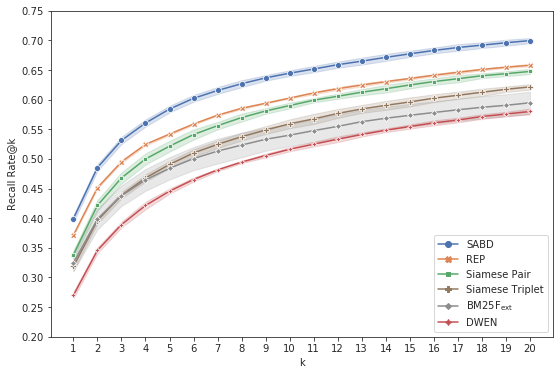

In [104]:
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
 [0.329224,0.404795,0.445662,0.474658,0.494749,0.510046,0.520320,0.531507,0.540868,0.546804,0.553653,0.560959,0.570320,0.576027,0.581507,0.586530,0.592009,0.596119,0.597717,0.603196,],
[0.306164,0.371918,0.414612,0.438128,0.456393,0.472146,0.481963,0.492466,0.503653,0.513014,0.519635,0.525342,0.534247,0.540411,0.545434,0.549543,0.554338,0.558904,0.562557,0.566667,],
[0.335845,0.411644,0.449315,0.473973,0.494064,0.511416,0.526256,0.536301,0.547489,0.553196,0.560502,0.568265,0.575114,0.581279,0.585388,0.589726,0.594521,0.599315,0.602740,0.607306,],
[0.338813,0.414840,0.455023,0.482648,0.502283,0.519863,0.534475,0.543607,0.549543,0.556849,0.566667,0.576027,0.583105,0.587671,0.59264,0.595890,0.599543,0.603425,0.607991,0.611187,],
[0.313699,0.390411,0.424886,0.453196,0.473516,0.488813,0.502740,0.512785,0.523744,0.530137,0.537900,0.543607,0.550913,0.557306,0.562557,0.569406,0.573744,0.577169,0.580822,0.584703]
    ]),
'REP': np.asarray([
    [0.372146,0.453881,0.497032,0.527169,0.543151,0.559132,0.574658,0.587215,0.595205,0.603425,0.613699,0.621233,0.628995,0.632877,0.638128,0.644064,0.649772,0.653425,0.656621,0.660731,],
    [0.368721,0.450457,0.493607,0.522146,0.538584,0.556849,0.571918,0.583562,0.592922,0.601598,0.607763,0.615297,0.623973,0.628539,0.635388,0.640411,0.644749,0.650228,0.654566,0.658447,],
    [0.372603,0.450457,0.492466,0.524658,0.542694,0.560502,0.574658,0.584703,0.593379,0.602511,0.611872,0.618721,0.623516,0.629909,0.633562,0.639726,0.643607,0.649772,0.652740,0.655479,],
    [0.372146,0.451370,0.496119,0.523516,0.542466,0.559589,0.573516,0.586301,0.594292,0.602283,0.610046,0.617808,0.622146,0.629224,0.634247,0.640183,0.645434,0.649543,0.654110,0.656621,],
    [0.371689,0.450685,0.496119,0.524886,0.542009,0.557991,0.573973,0.584703,0.593607,0.603196,0.612557,0.619178,0.624658,0.631279,0.636530,0.641553,0.646575,0.651142,0.655479,0.658676,],
    ]),
"DWEN":np.asarray([
    [0.271689497716895, 0.35091324200913243, 0.3954337899543379, 0.4319634703196347, 0.4520547945205479, 0.4684931506849315, 0.48333333333333334, 0.4963470319634703, 0.5052511415525114, 0.515296803652968, 0.5248858447488585, 0.5319634703196348, 0.5404109589041096, 0.5465753424657535, 0.5522831050228311, 0.556392694063927, 0.5611872146118722, 0.5689497716894977, 0.5721461187214611, 0.5778538812785388],
    [0.27488584474885847, 0.34885844748858447, 0.3926940639269406, 0.4232876712328767, 0.4474885844748858, 0.4691780821917808, 0.48424657534246573, 0.4954337899543379, 0.5068493150684932, 0.5184931506849315, 0.5276255707762557, 0.5378995433789955, 0.5438356164383562, 0.5493150684931507, 0.556392694063927, 0.5636986301369863, 0.5684931506849316, 0.5737442922374429, 0.5780821917808219, 0.5821917808219178],
    [0.2684931506849315, 0.34726027397260273, 0.38767123287671235, 0.41712328767123286, 0.441324200913242, 0.4636986301369863, 0.480365296803653, 0.4958904109589041, 0.5098173515981735, 0.5200913242009132, 0.5280821917808219, 0.5356164383561643, 0.5436073059360731, 0.5522831050228311, 0.5589041095890411, 0.5652968036529681, 0.5698630136986301, 0.5753424657534246, 0.5792237442922374, 0.5856164383561644],
    [0.26187214611872145, 0.33858447488584476, 0.3835616438356164, 0.41643835616438357, 0.44269406392694066, 0.46141552511415523, 0.47876712328767124, 0.4942922374429224, 0.5054794520547945, 0.5164383561643836, 0.5255707762557078, 0.5349315068493151, 0.5426940639269406, 0.5495433789954338, 0.5557077625570777, 0.5623287671232877, 0.5668949771689498, 0.5732876712328767, 0.5778538812785388, 0.5815068493150685],
    [0.2737442922374429, 0.34315068493150686, 0.3865296803652968, 0.4182648401826484, 0.4440639269406393, 0.4634703196347032, 0.4805936073059361, 0.491324200913242, 0.5011415525114156, 0.510958904109589, 0.5180365296803653, 0.5253424657534247, 0.5351598173515981, 0.5440639269406393, 0.5497716894977169, 0.5559360730593608, 0.5614155251141553, 0.5657534246575342, 0.5707762557077626, 0.5726027397260274],

    ]),
"Siamese Pair": np.asarray([
    [0.33926940639269404, 0.4232876712328767, 0.4703196347031963, 0.49931506849315066, 0.5221461187214612, 0.5404109589041096, 0.5557077625570777, 0.5694063926940639, 0.5789954337899543, 0.5892694063926941, 0.5972602739726027, 0.6034246575342466, 0.6100456621004566, 0.6141552511415526, 0.6226027397260274, 0.6273972602739726, 0.6344748858447489, 0.6385844748858448, 0.6410958904109589, 0.6436073059360731],
   [0.33424657534246577, 0.4191780821917808, 0.4668949771689498, 0.49726027397260275, 0.5187214611872146, 0.5374429223744293, 0.5525114155251142, 0.5646118721461187, 0.5764840182648402, 0.5860730593607306, 0.5990867579908675, 0.6077625570776256, 0.6143835616438356, 0.6210045662100456, 0.6271689497716895, 0.6342465753424658, 0.6385844748858448, 0.6429223744292237, 0.6463470319634703, 0.6509132420091325],
[0.3458904109589041, 0.43105022831050227, 0.48013698630136986, 0.5105022831050229, 0.5321917808219178, 0.5493150684931507, 0.5634703196347032, 0.5778538812785388, 0.586986301369863, 0.5961187214611872, 0.602054794520548, 0.6082191780821918, 0.6155251141552511, 0.6235159817351598, 0.6296803652968036, 0.6342465753424658, 0.6381278538812786, 0.6410958904109589, 0.6454337899543379, 0.6506849315068494],
[0.32922374429223744, 0.40730593607305937, 0.45365296803652966, 0.4858447488584475, 0.5077625570776255, 0.5289954337899543, 0.5477168949771689, 0.5616438356164384, 0.5769406392694064, 0.5847031963470319, 0.593607305936073, 0.5988584474885845, 0.6045662100456621, 0.6091324200913242, 0.615296803652968, 0.6219178082191781, 0.6248858447488584, 0.6340182648401826, 0.6376712328767123, 0.6415525114155252],
[0.34383561643835614, 0.4271689497716895, 0.4684931506849315, 0.5061643835616438, 0.526255707762557, 0.5493150684931507, 0.5607305936073059, 0.5748858447488584, 0.5844748858447488, 0.593607305936073, 0.6027397260273972, 0.6095890410958904, 0.6178082191780822, 0.6237442922374429, 0.6285388127853881, 0.6340182648401826, 0.6399543378995434, 0.6445205479452055, 0.647716894977169, 0.6506849315068494], 
    ]),
"Siamese Triplet": np.asarray([
[0.3223744292237443, 0.3963470319634703, 0.44337899543378995, 0.47077625570776255, 0.491324200913242, 0.5082191780821917, 0.5260273972602739, 0.5401826484018265, 0.5509132420091324, 0.5600456621004566, 0.5671232876712329, 0.5762557077625571, 0.5842465753424657, 0.5929223744292238, 0.5986301369863014, 0.6054794520547945, 0.6102739726027397, 0.615296803652968, 0.6203196347031964, 0.6242009132420091],
[0.32374429223744294, 0.4009132420091324, 0.441324200913242, 0.4730593607305936, 0.49931506849315066, 0.5182648401826484, 0.5317351598173516, 0.545662100456621, 0.5568493150684931, 0.5678082191780822, 0.5785388127853881, 0.584931506849315, 0.5929223744292238, 0.5986301369863014, 0.6047945205479452, 0.6091324200913242, 0.6139269406392694, 0.619406392694064, 0.6226027397260274, 0.626027397260274],
[0.31552511415525114, 0.39817351598173517, 0.44018264840182647, 0.4671232876712329, 0.48698630136986304, 0.5045662100456622, 0.5171232876712328, 0.5312785388127854, 0.5429223744292238, 0.5525114155251142, 0.5600456621004566, 0.5703196347031964, 0.5785388127853881, 0.5819634703196347, 0.586986301369863, 0.5949771689497717, 0.6002283105022831, 0.6045662100456621, 0.6114155251141552, 0.6146118721461187],
[0.30684931506849317, 0.38767123287671235, 0.42945205479452053, 0.4577625570776256, 0.4831050228310502, 0.5041095890410959, 0.5189497716894977, 0.530365296803653, 0.541095890410959, 0.5506849315068493, 0.5584474885844749, 0.5682648401826484, 0.5769406392694064, 0.582648401826484, 0.5894977168949772, 0.595662100456621, 0.6013698630136987, 0.6077625570776256, 0.6134703196347032, 0.6189497716894977],
[0.32442922374429223, 0.39680365296803655, 0.4397260273972603, 0.47009132420091326, 0.49246575342465754, 0.5148401826484018, 0.5289954337899543, 0.5397260273972603, 0.5515981735159817, 0.5648401826484019, 0.5730593607305936, 0.5833333333333334, 0.5883561643835616, 0.5952054794520548, 0.6002283105022831, 0.60662100456621, 0.610730593607306, 0.6146118721461187, 0.6189497716894977, 0.6232876712328768],
    ]),   
"SABD": np.asarray([
[0.4054794520547945, 0.4899543378995434, 0.5397260273972603, 0.5703196347031964, 0.5908675799086758, 0.6091324200913242, 0.6223744292237443, 0.6337899543378995, 0.6429223744292237, 0.6515981735159817, 0.6582191780821918, 0.6659817351598174, 0.6719178082191781, 0.6787671232876712, 0.6837899543378996, 0.6892694063926941, 0.6938356164383561, 0.6963470319634704, 0.702054794520548, 0.7047945205479452],
 [0.40273972602739727, 0.4840182648401826, 0.5287671232876713, 0.5561643835616439, 0.5771689497716895, 0.5958904109589042, 0.608675799086758, 0.6191780821917808, 0.6315068493150685, 0.6390410958904109, 0.6447488584474886, 0.6520547945205479, 0.6573059360730593, 0.6636986301369863, 0.6705479452054794, 0.6773972602739726, 0.6808219178082192, 0.6863013698630137, 0.6906392694063926, 0.6961187214611873],
 [0.39817351598173517, 0.4858447488584475, 0.5301369863013699, 0.5602739726027397, 0.5860730593607306, 0.6041095890410959, 0.6164383561643836, 0.6296803652968036, 0.6397260273972603, 0.6468036529680365, 0.6552511415525114, 0.6616438356164384, 0.6691780821917809, 0.6751141552511416, 0.6810502283105023, 0.6865296803652968, 0.6931506849315069, 0.6974885844748858, 0.7006849315068493, 0.7034246575342465],
 [0.4, 0.4899543378995434, 0.5335616438356164, 0.5607305936073059, 0.5865296803652968, 0.6050228310502284, 0.6191780821917808, 0.6289954337899544, 0.6360730593607306, 0.6426940639269406, 0.6502283105022831, 0.6570776255707762, 0.6643835616438356, 0.669634703196347, 0.6751141552511416, 0.6817351598173516, 0.6867579908675799, 0.6897260273972603, 0.6929223744292238, 0.6961187214611873],
 [0.3901826484018265, 0.47648401826484016, 0.5232876712328767, 0.5550228310502283, 0.5794520547945206, 0.5965753424657534, 0.6102739726027397, 0.6223744292237443, 0.6328767123287671, 0.6424657534246575, 0.6490867579908676, 0.6575342465753424, 0.6614155251141552, 0.6687214611872146, 0.6753424657534246, 0.6794520547945205, 0.6844748858447488, 0.6892694063926941, 0.6931506849315069, 0.6970319634703196] 
])
}
    
sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))

order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res,order))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.20, 0.75))

fig = ax.get_figure()
fig.savefig("plots/eclipse_365.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [105]:
bm25f_map = np.asarray([0.415684, 0.377316, 0.411492, 0.415684, 0.389363])
rep_map = np.asarray([0.452006, 0.452244, 0.452085, 0.449791, 0.45329])
dwen = np.asarray([0.3561506323375552, 0.35682982990957257, 0.35243764573853953, 0.34689468035844306, 0.35364308625652097])
siamese_pair = np.asarray([0.4250679197922608, 0.4215836877867513, 0.4325238456401305, 0.41413041686404983, 0.42945642664132866])
siamese_triplets = np.asarray([0.403340600398003, 0.4058531226074743, 0.39857717319223795, 0.39092783258121466, 0.4045533245329318])
sabd_map = np.asarray([0.4908141860823021, 0.4843790622124468, 0.48436596950406685, 0.4858750484233919, 0.4769677120054219])



data = [
    ["DWEN",dwen.mean(), dwen.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets.mean(), siamese_triplets.std()],
    ["Siamese Pairs", siamese_pair.mean(), siamese_pair.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()]
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)
dwen = bm25f_map = siamese_triplets = siamese_pair = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.353[0.004]
0.402[0.016]
0.401[0.005]
0.425[0.006]
0.452[0.001]
0.484[0.004]



,Method,MAP - Mean,STD
0,DWEN,0.353191,0.003533
1,BM25F,0.401908,0.015707
2,Siamese Triplets,0.400650,0.005447
3,Siamese Pairs,0.424552,0.006408
4,REP,0.451883,0.001144
5,SABD,0.484480,0.004439


### *1.2 - Window - 3 years*

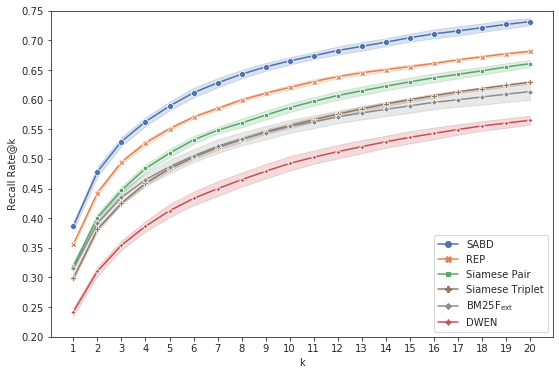

In [96]:
bm25f_map = np.asarray([0.389746,0.410477, 0.401390,0.392275,0.384324])


recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
       [0.307763,0.384475,0.426484,0.458447,0.478539,0.500000,0.515297,0.526712,0.537671,0.549543,0.559817,0.567352,0.572603,0.578311,0.582877,0.588584,0.592694,0.597489,0.601826,0.605023],
       [0.329680,0.402055,0.449543,0.475799,0.500913,0.519635,0.536986,0.548174,0.558447,0.568265,0.577626,0.585616,0.592694,0.600913,0.607991,0.613242,0.616667,0.623973,0.626941,0.631735],
        [0.320548,0.393151,0.439954,0.468265,0.493836,0.507991,0.523516,0.536073,0.549315,0.559132,0.564155,0.574886,0.582420,0.589498,0.596119,0.601370,0.607763,0.613470,0.617808,0.622146],
        [0.310731,0.386530,0.429224,0.462557,0.482420,0.501370,0.517808,0.528082,0.539269,0.549772,0.557534,0.566667,0.571233,0.577169,0.582877,0.589269,0.592694,0.596119,0.601826,0.606164],
        [0.302283,0.378539,0.422374,0.453881,0.473059,0.492009,0.508676,0.523059,0.532877,0.543151,0.552055,0.560502,0.567352,0.573744,0.579680,0.584475,0.587443,0.592009,0.595434,0.598402],
    [0.305023,0.380365,0.420548,0.445662,0.471233,0.487900,0.502283,0.517808,0.525571,0.537215,0.544977,0.554795,0.560959,0.566667,0.572831,0.579680,0.585160,0.586986,0.590868,0.594749,],
[0.328082,0.403196,0.447032,0.475342,0.499315,0.517580,0.533105,0.545205,0.556164,0.568265,0.575114,0.583105,0.588584,0.594749,0.601370,0.606849,0.610046,0.617123,0.624429,0.628995,],
[0.312329,0.390411,0.432877,0.464840,0.485388,0.504795,0.523059,0.532648,0.542922,0.552740,0.559589,0.565982,0.572831,0.579224,0.584018,0.590411,0.596347,0.599087,0.604110,0.609361,],
[0.310046,0.388356,0.430822,0.464384,0.483790,0.502968,0.517808,0.528995,0.539954,0.551142,0.558676,0.565297,0.572374,0.577397,0.582648,0.589269,0.593151,0.597032,0.602283,0.607306,],
[0.329680,0.405936,0.452055,0.479680,0.500913,0.518950,0.535616,0.549315,0.559132,0.567580,0.576712,0.585160,0.592466,0.598858,0.603881,0.610959,0.615068,0.620091,0.625342,0.631050,],

    ]),
'REP': np.asarray([
        [0.350457,0.436073,0.489726,0.520320,0.545434,0.565525,0.581050,0.594292,0.605936,0.613699,0.624201,0.634247,0.640411,0.645662,0.651142,0.657306,0.663470,0.668721,0.673516,0.676712],
        [0.355479,0.440639,0.491096,0.523973,0.548174,0.570548,0.584703,0.597945,0.609589,0.618950,0.628539,0.637215,0.642009,0.647717,0.653653,0.660731,0.666210,0.671461,0.675571,0.680594],
        [0.356621,0.445205,0.497945,0.529680,0.554338,0.571918,0.584247,0.600913,0.611416,0.622603,0.632192,0.641096,0.647032,0.653196,0.656849,0.662557,0.669178,0.673973,0.680365,0.683562],
        [0.358904,0.444749,0.497260,0.530594,0.553425,0.572831,0.587215,0.601142,0.613242,0.623059,0.632648,0.639498,0.648174,0.652283,0.657991,0.662329,0.668721,0.673059,0.677626,0.682420] ,
        [0.359361,0.446804,0.496347,0.529452,0.552740,0.571689,0.588356,0.602740,0.613242,0.623744,0.634018,0.641553,0.648402,0.653425,0.658904,0.662100,0.668265,0.673973,0.678995,0.683105] 
    ]),
'DWEN': np.asarray([
    [0.2502283105022831, 0.3162100456621005, 0.36232876712328765, 0.3947488584474886, 0.4228310502283105, 0.4440639269406393, 0.46073059360730595, 0.47511415525114153, 0.48812785388127855, 0.4988584474885845, 0.5114155251141552, 0.5212328767123288, 0.5296803652968036, 0.5372146118721461, 0.5445205479452054, 0.5511415525114155, 0.5575342465753425, 0.5627853881278538, 0.567351598173516, 0.5721461187214611],
    [0.24908675799086757, 0.3198630136986301, 0.36050228310502286, 0.39246575342465756, 0.42191780821917807, 0.4415525114155251, 0.4577625570776256, 0.47420091324200914, 0.49018264840182646, 0.5036529680365297, 0.5125570776255708, 0.5207762557077625, 0.528310502283105, 0.5360730593607306, 0.5454337899543379, 0.5509132420091324, 0.556392694063927, 0.5627853881278538, 0.5671232876712329, 0.5721461187214611],
    [0.23812785388127855, 0.31095890410958904, 0.35684931506849316, 0.38995433789954337, 0.41643835616438357, 0.43858447488584473, 0.4577625570776256, 0.4714611872146119, 0.4853881278538813, 0.5002283105022831, 0.5089041095890411, 0.519406392694064, 0.5278538812785388, 0.5349315068493151, 0.541324200913242, 0.547945205479452, 0.5538812785388127, 0.5582191780821918, 0.5632420091324201, 0.5678082191780822],
    [0.23538812785388127, 0.30091324200913244, 0.3445205479452055, 0.37397260273972605, 0.3993150684931507, 0.4187214611872146, 0.43401826484018263, 0.45045662100456624, 0.46757990867579907, 0.4819634703196347, 0.4922374429223744, 0.4990867579908676, 0.5068493150684932, 0.5148401826484018, 0.5235159817351598, 0.5312785388127854, 0.5399543378995434, 0.547945205479452, 0.5518264840182648, 0.5575342465753425],
    [0.23812785388127855, 0.30525114155251143, 0.34771689497716896, 0.38082191780821917, 0.40251141552511416, 0.42397260273972603, 0.4383561643835616, 0.45388127853881277, 0.4643835616438356, 0.4767123287671233, 0.48926940639269406, 0.5004566210045662, 0.5105022831050229, 0.5212328767123288, 0.5271689497716895, 0.5335616438356164, 0.5399543378995434, 0.5458904109589041, 0.552054794520548, 0.556392694063927],
    ]),
"Siamese Pair": np.asarray([
       [0.3226027397260274, 0.4084474885844749, 0.45662100456621, 0.49246575342465754, 0.5210045662100456, 0.5415525114155251, 0.554337899543379, 0.5705479452054795, 0.5842465753424657, 0.5961187214611872, 0.6068493150684932, 0.6178082191780822, 0.6262557077625571, 0.6342465753424658, 0.6417808219178082, 0.6493150684931507, 0.654337899543379, 0.6591324200913242, 0.6643835616438356, 0.6689497716894978],
       [0.31689497716894977, 0.39429223744292236, 0.441324200913242, 0.4785388127853881, 0.5052511415525114, 0.523972602739726, 0.541324200913242, 0.5531963470319635, 0.565068493150685, 0.5769406392694064, 0.5892694063926941, 0.5981735159817352, 0.6068493150684932, 0.6150684931506849, 0.6237442922374429, 0.630593607305936, 0.6363013698630137, 0.6442922374429224, 0.6511415525114155, 0.6568493150684932],
       [0.31141552511415527, 0.3972602739726027, 0.44452054794520546, 0.4785388127853881, 0.5045662100456622, 0.5321917808219178, 0.552054794520548, 0.5646118721461187, 0.5771689497716895, 0.5901826484018264, 0.6, 0.6095890410958904, 0.6164383561643836, 0.6235159817351598, 0.6312785388127854, 0.6376712328767123, 0.6436073059360731, 0.6502283105022831, 0.658675799086758, 0.6643835616438356],
       [0.31643835616438354, 0.39657534246575343, 0.4415525114155251, 0.480365296803653, 0.506392694063927, 0.5294520547945205, 0.5445205479452054, 0.5538812785388127, 0.5691780821917808, 0.5815068493150685, 0.591324200913242, 0.6031963470319635, 0.6116438356164383, 0.619406392694064, 0.6257990867579909, 0.6335616438356164, 0.6390410958904109, 0.6436073059360731, 0.6493150684931507, 0.6541095890410958],
       [0.3271689497716895, 0.4089041095890411, 0.45159817351598175, 0.48926940639269406, 0.510958904109589, 0.5328767123287671, 0.5488584474885845, 0.560958904109589, 0.5732876712328767, 0.5874429223744292, 0.5972602739726027, 0.6052511415525114, 0.6132420091324201, 0.6205479452054794, 0.6267123287671232, 0.632648401826484, 0.6394977168949771, 0.6452054794520548, 0.6511415525114155, 0.658675799086758]
    ]),
"Siamese Triplet": np.asarray([    
   [0.2990867579908676, 0.38538812785388127, 0.4257990867579909, 0.45730593607305936, 0.4831050228310502, 0.5020547945205479, 0.5159817351598174, 0.5269406392694064, 0.5408675799086758, 0.5495433789954338, 0.5602739726027397, 0.569634703196347, 0.5801369863013699, 0.5888127853881279, 0.5970319634703196, 0.6052511415525114, 0.6125570776255708, 0.6182648401826484, 0.6237442922374429, 0.6289954337899544],
   [0.2965753424657534, 0.3819634703196347, 0.42488584474885843, 0.4639269406392694, 0.4876712328767123, 0.5066210045662101, 0.5230593607305936, 0.5363013698630137, 0.5495433789954338, 0.5595890410958904, 0.5687214611872146, 0.578310502283105, 0.5865296803652968, 0.5947488584474886, 0.6004566210045662, 0.6059360730593607, 0.6132420091324201, 0.6184931506849315, 0.623972602739726, 0.6280821917808219],
   [0.2993150684931507, 0.3769406392694064, 0.4235159817351598, 0.4554794520547945, 0.48013698630136986, 0.49840182648401826, 0.5143835616438356, 0.5294520547945205, 0.5426940639269406, 0.5541095890410959, 0.5646118721461187, 0.5767123287671233, 0.5819634703196347, 0.5915525114155251, 0.5984018264840183, 0.6031963470319635, 0.6109589041095891, 0.6164383561643836, 0.621689497716895, 0.6280821917808219],
   [0.3025114155251142, 0.38424657534246576, 0.428310502283105, 0.46050228310502284, 0.4819634703196347, 0.5015981735159817, 0.5207762557077625, 0.5360730593607306, 0.55, 0.5602739726027397, 0.5716894977168949, 0.5792237442922374, 0.5904109589041096, 0.597716894977169, 0.6050228310502284, 0.613013698630137, 0.6168949771689498, 0.6226027397260274, 0.628310502283105, 0.6328767123287671],
   [0.29497716894977166, 0.3769406392694064, 0.42442922374429226, 0.45662100456621, 0.48447488584474885, 0.5054794520547945, 0.5214611872146119, 0.5342465753424658, 0.5465753424657535, 0.5570776255707762, 0.5652968036529681, 0.5735159817351598, 0.5821917808219178, 0.5894977168949772, 0.5979452054794521, 0.6054794520547945, 0.6121004566210045, 0.617579908675799, 0.6230593607305936, 0.6287671232876713],

    ]),  
"SABD": np.asarray([
 [0.37625570776255707, 0.46735159817351596, 0.5182648401826484, 0.5506849315068493, 0.5778538812785388, 0.6013698630136987, 0.6191780821917808, 0.6353881278538813, 0.6488584474885845, 0.6593607305936073, 0.6684931506849315, 0.6757990867579908, 0.682648401826484, 0.6897260273972603, 0.6972602739726027, 0.702054794520548, 0.7063926940639269, 0.713013698630137, 0.7184931506849315, 0.7244292237442922], 
 [0.39452054794520547, 0.4853881278538813, 0.5385844748858447, 0.5712328767123288, 0.5972602739726027, 0.6205479452054794, 0.6385844748858448, 0.6529680365296804, 0.6657534246575343, 0.6760273972602739, 0.6837899543378996, 0.6940639269406392, 0.7018264840182649, 0.7075342465753425, 0.7150684931506849, 0.7226027397260274, 0.7278538812785388, 0.7324200913242009, 0.7372146118721461, 0.7394977168949771],
 [0.38949771689497714, 0.4876712328767123, 0.5328767123287671, 0.565068493150685, 0.593607305936073, 0.619406392694064, 0.6340182648401826, 0.647716894977169, 0.6568493150684932, 0.6641552511415525, 0.6726027397260274, 0.6821917808219178, 0.6892694063926941, 0.6958904109589041, 0.7050228310502283, 0.7116438356164384, 0.7157534246575342, 0.7214611872146118, 0.7278538812785388, 0.7331050228310503],
 [0.38789954337899546, 0.476027397260274, 0.5299086757990867, 0.5625570776255707, 0.5881278538812785, 0.6089041095890411, 0.6248858447488584, 0.6394977168949771, 0.6515981735159817, 0.6636986301369863, 0.673972602739726, 0.6819634703196347, 0.6876712328767123, 0.6968036529680365, 0.7031963470319634, 0.7084474885844749, 0.7139269406392694, 0.7178082191780822, 0.7219178082191781, 0.7269406392694064],
 [0.3858447488584475, 0.47534246575342465, 0.5269406392694064, 0.5641552511415525, 0.5885844748858448, 0.6077625570776256, 0.6246575342465753, 0.6385844748858448, 0.6527397260273973, 0.663013698630137, 0.6712328767123288, 0.6796803652968036, 0.6872146118721462, 0.6942922374429223, 0.7011415525114155, 0.7095890410958904, 0.7148401826484019, 0.7214611872146118, 0.7280821917808219, 0.7333333333333333]
])
}


order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res, order))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.20, 0.75))
fig = ax.get_figure()
fig.savefig("plots/eclipse_1095.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [85]:
bm25f_map = np.asarray([0.384468, 0.409063, 0.394747, 0.392612, 0.411395])
rep_map = np.asarray([0.441275, 0.445455, 0.448365, 0.44953, 0.449998])
siamese_pair = np.asarray([0.41567725561839963, 0.405471039227035, 0.40494723176661584, 0.4059715831008165, 0.41553509844158193])
siamese_triplets = np.asarray([0.3878595579973063, 0.3871487180916757, 0.38593472924081584, 0.39040789605571763, 0.3846442524810897])
dwen_map = np.asarray([0.3324119722184216, 0.3320341100908575, 0.32416240594221113, 0.31607235844267956, 0.3191213746140143])
f_cadd_map = np.asarray([0.4716010424117169, 0.4897637198934405, 0.48546474334122564, 0.4813231641660979, 0.4803367193268434])


data = [
    ["DWEN", dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets.mean(), siamese_triplets.std()],
    ["Siamese Pairs", siamese_pair.mean(), siamese_pair.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", f_cadd_map.mean(), f_cadd_map.std()],
#     ["DBR-CNN", dbr_map.mean(), dbr_map.std()]
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen_map = bm25f_map = siamese_triplets = siamese_pair = rep_map = f_cadd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.325[0.007]
0.398[0.010]
0.387[0.002]
0.410[0.005]
0.447[0.003]
0.482[0.006]



,Method,MAP - Mean,STD
0,DWEN,0.324760,0.006620
1,BM25F,0.398457,0.010232
2,Siamese Triplets,0.387199,0.001942
3,Siamese Pairs,0.409520,0.004980
4,REP,0.446925,0.003237
5,SABD,0.481698,0.006053


# **2 - Open Office**


### *2.1 - Window - 1 years*


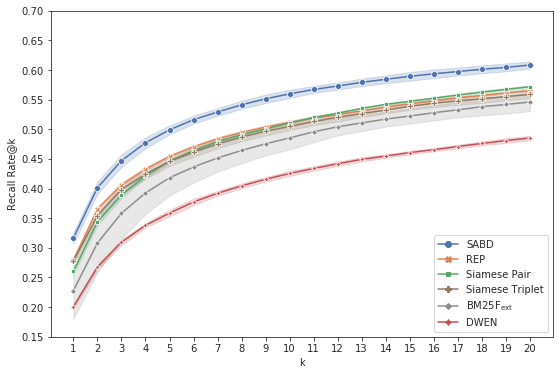

In [97]:
labels =[]

recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
        [0.280660,0.362564,0.405017,0.431818,0.450043,0.464408,0.476630,0.487350,0.497213,0.507290,0.515866,0.521226,0.526587,0.531304,0.536235,0.541595,0.546741,0.554031,0.558748,0.562607,],
        [0.279588,0.361492,0.404588,0.431175,0.451115,0.465909,0.476630,0.488422,0.496355,0.506218,0.513937,0.518868,0.524657,0.530446,0.536235,0.542453,0.546527,0.554031,0.557890,0.563036,],
        [0.189108,0.269940,0.323542,0.363422,0.394297,0.414451,0.432890,0.447041,0.460334,0.470412,0.481990,0.491852,0.498714,0.506647,0.512436,0.517796,0.522513,0.527444,0.530232,0.533877,],
        [0.197684,0.274871,0.332762,0.370712,0.398799,0.419383,0.437178,0.449828,0.462050,0.471913,0.484348,0.495283,0.502787,0.509220,0.513508,0.518654,0.523799,0.526587,0.530017,0.535163,],
        [0.192324,0.271870,0.325901,0.365566,0.396655,0.417667,0.434605,0.448542,0.461192,0.471269,0.482419,0.493353,0.500858,0.507719,0.513079,0.518654,0.524014,0.527873,0.531947,0.534949,],
       ]),
'REP': np.asarray([
        [0.273156,0.357847,0.398799,0.429031,0.450901,0.466123,0.478345,0.490780,0.500214,0.508362,0.517367,0.522084,0.528945,0.535377,0.540094,0.545669,0.550172,0.555532,0.559605,0.563250,],
        [0.278731,0.363636,0.403302,0.433533,0.453473,0.470197,0.482847,0.495712,0.506003,0.514365,0.521441,0.526372,0.531304,0.539666,0.542667,0.547384,0.553173,0.556175,0.561750,0.564751,],
        [0.283662,0.368139,0.409091,0.436535,0.455189,0.471698,0.485635,0.497856,0.506432,0.515437,0.522084,0.526801,0.534091,0.541595,0.547384,0.551458,0.554889,0.559177,0.562607,0.566895,],
        [0.281304,0.369640,0.409305,0.432890,0.453688,0.471484,0.487350,0.496141,0.504931,0.510720,0.518654,0.525729,0.530875,0.535806,0.542667,0.547170,0.553602,0.557247,0.562393,0.566038,],
        [0.278516,0.366424,0.409520,0.432676,0.457976,0.472985,0.484348,0.492710,0.500858,0.508362,0.514794,0.522084,0.529374,0.534949,0.540738,0.546312,0.552959,0.556389,0.561106,0.565609]
    ]),
'DWEN': np.asarray([
    [0.2006861063464837, 0.26543739279588335, 0.30853344768439106, 0.33554888507718694, 0.35141509433962265, 0.37006861063464835, 0.38636363636363635, 0.40051457975986277, 0.41102058319039453, 0.4228130360205832, 0.43138936535162953, 0.4403945111492281, 0.44746998284734135, 0.4526157804459691, 0.45797598627787306, 0.4624785591766724, 0.4665523156089194, 0.4716981132075472, 0.4753430531732418, 0.479631217838765],
    [0.2032590051457976, 0.2748713550600343, 0.3171097770154374, 0.3426243567753002, 0.3584905660377358, 0.37800171526586623, 0.3942967409948542, 0.40630360205831906, 0.4183104631217839, 0.4283876500857633, 0.4358919382504288, 0.44554030874785594, 0.4526157804459691, 0.4571183533447684, 0.46269296740994853, 0.46826758147512865, 0.4734133790737564, 0.4794168096054888, 0.4854202401372213, 0.48906518010291594],
    [0.20304459691252144, 0.26500857632933106, 0.3096054888507719, 0.34069468267581476, 0.3653516295025729, 0.38486277873070324, 0.39644082332761577, 0.4095197255574614, 0.419811320754717, 0.42903087478559176, 0.43717838765008576, 0.4444682675814751, 0.45154373927958835, 0.4571183533447684, 0.463336192109777, 0.46826758147512865, 0.47384219554030876, 0.47855917667238423, 0.4839193825042882, 0.48863636363636365],
    [0.19639794168096056, 0.26500857632933106, 0.30510291595197253, 0.33469125214408235, 0.35548885077186965, 0.3747855917667238, 0.3893653516295026, 0.3998713550600343, 0.4125214408233276, 0.41916809605488853, 0.42860205831903947, 0.436106346483705, 0.44382504288164665, 0.4509005145797599, 0.4571183533447684, 0.463336192109777, 0.4689108061749571, 0.47427101200686106, 0.47898799313893653, 0.48434819897084047],
    [0.20111492281303603, 0.2677958833619211, 0.3068181818181818, 0.3361921097770154, 0.3623499142367067, 0.3792881646655232, 0.3934391080617496, 0.4065180102915952, 0.41702401372212694, 0.42753001715265865, 0.4363207547169811, 0.4425385934819897, 0.45047169811320753, 0.4562607204116638, 0.4618353344768439, 0.46569468267581476, 0.4716981132075472, 0.47641509433962265, 0.48048885077186965, 0.48456260720411665],
]),
'Siamese Pair':np.asarray([
        [0.258147512864494, 0.34712692967409947, 0.39065180102915953, 0.42109777015437394, 0.44596912521440824, 0.4624785591766724, 0.48048885077186965, 0.4922813036020583, 0.5015008576329331, 0.5113636363636364, 0.5199399656946827, 0.5250857632933105, 0.535377358490566, 0.54073756432247, 0.5452401372212693, 0.5508147512864494, 0.5572469982847341, 0.5617495711835334, 0.567967409948542, 0.5724699828473413],
        [0.2596483704974271, 0.34133790737564323, 0.3846483704974271, 0.4236706689536878, 0.44897084048027447, 0.46976843910806176, 0.4832761578044597, 0.4937821612349914, 0.5023584905660378, 0.510934819897084, 0.5210120068610634, 0.5287307032590052, 0.5366638078902229, 0.5424528301886793, 0.5478130360205832, 0.5521012006861064, 0.5583190394511149, 0.5636792452830188, 0.5683962264150944, 0.5724699828473413],
        [0.262221269296741, 0.3516295025728988, 0.39472555746140653, 0.4243138936535163, 0.44746998284734135, 0.46226415094339623, 0.4770583190394511, 0.4897084048027444, 0.49935677530017153, 0.5085763293310464, 0.5188679245283019, 0.5255145797598628, 0.5338765008576329, 0.5415951972555746, 0.5458833619210978, 0.5510291595197255, 0.5551029159519726, 0.5596054888507719, 0.5645368782161235, 0.5686106346483705],
        [0.2538593481989708, 0.33704974271012006, 0.383147512864494, 0.4159519725557461, 0.4425385934819897, 0.4611921097770154, 0.475557461406518, 0.4858490566037736, 0.4984991423670669, 0.5107204116638079, 0.5186535162950258, 0.5268010291595198, 0.5343053173241853, 0.5426672384219554, 0.5475986277873071, 0.5518867924528302, 0.5566037735849056, 0.5611063464837049, 0.5653945111492281, 0.5698970840480274],
        [0.26758147512864494, 0.3426243567753002, 0.391295025728988, 0.4217409948542024, 0.4472555746140652, 0.46397941680960547, 0.47855917667238423, 0.4916380789022298, 0.5002144082332761, 0.513507718696398, 0.5210120068610634, 0.5295883361921098, 0.5360205831903945, 0.5428816466552315, 0.5493138936535163, 0.5557461406518011, 0.5611063464837049, 0.5664665523156089, 0.5698970840480274, 0.5748284734133791]
    ]),
'Siamese Triplet': np.asarray([
   [0.2722984562607204, 0.3484133790737564, 0.3874356775300172, 0.4135934819897084, 0.43546312178387653, 0.44961406518010294, 0.46419382504288165, 0.47598627787307035, 0.4858490566037736, 0.495926243567753, 0.5032161234991424, 0.5083619210977701, 0.5160806174957119, 0.5229416809605489, 0.5291595197255574, 0.5328044596912521, 0.5366638078902229, 0.5400943396226415, 0.5452401372212693, 0.5490994854202401],
   [0.28323327615780447, 0.3591337907375643, 0.40265866209262435, 0.42560034305317324, 0.4481132075471698, 0.4644082332761578, 0.47684391080617494, 0.4879931389365352, 0.4995711835334477, 0.5075042881646655, 0.5154373927958834, 0.5222984562607204, 0.5274442538593482, 0.5319468267581475, 0.5388078902229846, 0.5437392795883362, 0.5473842195540308, 0.5497427101200686, 0.5525300171526587, 0.5563893653516295],
   [0.2830188679245283, 0.35698970840480276, 0.4080188679245283, 0.43331903945111494, 0.4547598627787307, 0.47041166380789023, 0.4834905660377358, 0.49421097770154376, 0.5042881646655232, 0.5122212692967409, 0.5186535162950258, 0.5255145797598628, 0.5315180102915952, 0.5366638078902229, 0.54352487135506, 0.5482418524871355, 0.5529588336192109, 0.5572469982847341, 0.5604631217838765, 0.5638936535162951],
    [0.27401372212692965, 0.35098627787307035, 0.39451114922813035, 0.42045454545454547, 0.44125214408233276, 0.4584048027444254, 0.4729845626072041, 0.4856346483704974, 0.4933533447684391, 0.5010720411663808, 0.5113636363636364, 0.5203687821612349, 0.5263722126929674, 0.5334476843910806, 0.5394511149228131, 0.5454545454545454, 0.5503859348198971, 0.5546740994854202, 0.5583190394511149, 0.5634648370497427],
    [0.27958833619210977, 0.35527444253859347, 0.3992281303602058, 0.427958833619211, 0.44982847341337906, 0.4654802744425386, 0.4794168096054888, 0.49056603773584906, 0.4997855917667238, 0.5075042881646655, 0.5167238421955404, 0.5240137221269296, 0.5298027444253859, 0.5364493996569468, 0.5424528301886793, 0.5482418524871355, 0.5521012006861064, 0.5551029159519726, 0.5581046312178388, 0.5611063464837049],
]),
'SABD': np.asarray([
    [0.3053173241852487, 0.3951543739279588, 0.44125214408233276, 0.475557461406518, 0.49678387650085765, 0.5120068610634648, 0.5246569468267581, 0.5347341337907375, 0.5456689536878216, 0.5525300171526587, 0.5621783876500858, 0.5688250428816467, 0.5754716981132075, 0.5801886792452831, 0.5855488850771869, 0.5900514579759862, 0.5947684391080618, 0.5988421955403087, 0.6022727272727273, 0.605917667238422],
 [0.3177530017152659, 0.399442538593482, 0.4466123499142367, 0.4766295025728988, 0.49656946826758147, 0.5137221269296741, 0.5268010291595198, 0.5400943396226415, 0.5518867924528302, 0.5621783876500858, 0.5690394511149228, 0.5752572898799314, 0.5804030874785592, 0.5857632933104632, 0.5915523156089194, 0.5958404802744426, 0.5992710120068611, 0.6027015437392796, 0.6054888507718696, 0.6102058319039451],
 [0.32289879931389365, 0.4090909090909091, 0.4530445969125214, 0.47641509433962265, 0.5, 0.5197255574614065, 0.5308747855917667, 0.5439536878216124, 0.5527444253859348, 0.5619639794168096, 0.5688250428816467, 0.5731132075471698, 0.5782590051457976, 0.5838336192109777, 0.5881217838765008, 0.5917667238421955, 0.5951972555746141, 0.5996998284734134, 0.6037735849056604, 0.6078473413379074],
 [0.3276157804459691, 0.4140222984562607, 0.4607632933104631, 0.4914236706689537, 0.510934819897084, 0.5261578044596913, 0.5394511149228131, 0.551672384219554, 0.5621783876500858, 0.5688250428816467, 0.5750428816466552, 0.5816895368782161, 0.5889794168096055, 0.5943396226415094, 0.6001286449399656, 0.6046312178387651, 0.6076329331046312, 0.6112778730703259, 0.6142795883361921, 0.616852487135506],
 [0.30853344768439106, 0.38893653516295024, 0.43331903945111494, 0.4659090909090909, 0.49056603773584906, 0.5090051457975986, 0.5235849056603774, 0.5358061749571184, 0.5441680960548885, 0.5529588336192109, 0.5600343053173242, 0.5658233276157805, 0.5724699828473413, 0.5769725557461407, 0.5806174957118353, 0.5853344768439108, 0.589622641509434, 0.5930531732418525, 0.5958404802744426, 0.6003430531732419]
])
}


order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res, order))
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.15, 0.7))

fig = ax.get_figure()
fig.savefig("plots/openoffice_365.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [98]:
bm25f_map = np.asarray([0.3603, 0.359528, 0.281337, 0.288106, 0.28387])
rep_map = np.asarray([0.35545, 0.360488, 0.364682, 0.363283, 0.361208])
dwen = np.asarray([0.2747402565988128, 0.28004618274582366, 0.2779400689591309, 0.27247261751761975, 0.2764001339253106])
siamese_pair_map = np.asarray([0.34551091924592603, 0.34540055675040454, 0.34859231083338776, 0.3404693696131991, 0.3498519976737898])
siamese_triplets_map = np.asarray([0.34904178272894065, 0.36028149380857705, 0.36176885780714035, 0.35286082355940135, 0.3580395176070586])
sabd_map = np.asarray([0.3921626165417968, 0.40021569250339234, 0.4052653514167711, 0.4112937978876858, 0.3909634920847687])


data = [
    ["DWEN",dwen.mean(), dwen.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],    
    ["Siamese Triplets", siamese_triplets_map.mean(), siamese_triplets_map.std()],
    ["Siamese Pairs", siamese_pair_map.mean(), siamese_pair_map.std()],    
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()],
#     ["DBR-CNN", dbr_map.mean(), dbr_map.std()]
    
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen = bm25f_map = siamese_pair_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.276[0.003]
0.315[0.037]
0.356[0.005]
0.346[0.003]
0.361[0.003]
0.400[0.008]



,Method,MAP - Mean,STD
0,DWEN,0.276320,0.002601
1,BM25F,0.314628,0.037040
2,Siamese Triplets,0.356398,0.004759
3,Siamese Pairs,0.345965,0.003248
4,REP,0.361022,0.003158
5,SABD,0.399980,0.007725


### *2.2 - Window - 3 years*


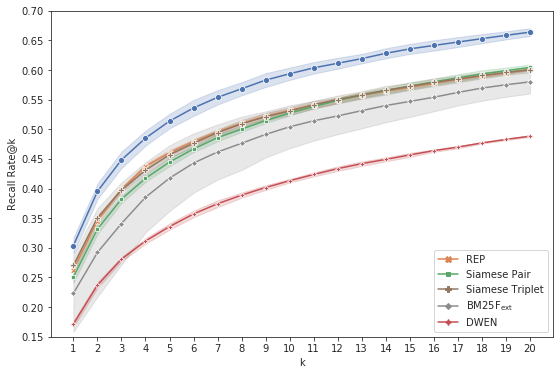

In [87]:
labels =[]
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
    [0.270583,0.347556,0.391295,0.429460,0.458619,0.478988,0.495497,0.509434,0.518439,0.529803,0.537307,0.545026,0.551887,0.559177,0.565823,0.571398,0.578259,0.584906,0.590695,0.594340,],
[0.271226,0.346484,0.392367,0.428388,0.458190,0.480703,0.495712,0.510077,0.520798,0.530875,0.539666,0.545455,0.553388,0.561321,0.565823,0.571612,0.578473,0.585549,0.590051,0.594983,],
[0.269940,0.345840,0.391295,0.427530,0.457118,0.478774,0.495712,0.507933,0.519940,0.530875,0.539022,0.544383,0.554245,0.561106,0.566467,0.570969,0.577830,0.584477,0.588765,0.593696,],
[0.149657,0.206475,0.261364,0.317753,0.353774,0.385292,0.408019,0.424743,0.446184,0.461835,0.476415,0.486492,0.496355,0.507719,0.517153,0.526801,0.536878,0.544168,0.550815,0.556818,],
[0.155017,0.214623,0.268868,0.323113,0.359991,0.391081,0.413379,0.429460,0.451329,0.467196,0.478774,0.490995,0.500858,0.510506,0.519297,0.529160,0.539022,0.547813,0.554674,0.559820,]
            ]),
'REP': np.asarray([
    [0.267153,0.349700,0.401801,0.441681,0.464623,0.483919,0.500214,0.514151,0.528302,0.536664,0.545883,0.553602,0.561106,0.566895,0.573113,0.579545,0.586407,0.590909,0.595197,0.603130,],
[0.265009,0.348413,0.400515,0.435892,0.459691,0.478559,0.495069,0.509434,0.520154,0.529803,0.539237,0.547170,0.556604,0.561964,0.569897,0.578473,0.584262,0.588979,0.593268,0.601415,],
[0.259220,0.341123,0.394511,0.433105,0.455403,0.476415,0.490780,0.505146,0.515866,0.527659,0.535377,0.544168,0.552530,0.561964,0.568825,0.575901,0.582118,0.587479,0.593911,0.598413,],
[0.257719,0.341767,0.394082,0.435034,0.457762,0.474700,0.492925,0.508576,0.518868,0.528945,0.537521,0.546527,0.554245,0.563036,0.569039,0.576115,0.583190,0.591123,0.596269,0.600129,],
[0.265866,0.348199,0.402659,0.442110,0.465909,0.482204,0.498928,0.512436,0.526801,0.535377,0.544168,0.554031,0.561321,0.567110,0.572684,0.578045,0.584262,0.590909,0.596269,0.602487,],
    ]),
'DWEN': np.asarray([
[0.18010291595197256, 0.24356775300171526, 0.282590051457976, 0.3171097770154374, 0.34326758147512865, 0.3629931389365352, 0.38014579759862777, 0.3927958833619211, 0.40437392795883365, 0.41680960548885077, 0.4283876500857633, 0.43760720411663806, 0.44639794168096053, 0.45240137221269294, 0.45861921097770153, 0.4665523156089194, 0.47277015437392794, 0.4777015437392796, 0.48263293310463123, 0.4879931389365352],
[0.1717409948542024, 0.24099485420240138, 0.2828044596912521, 0.3136792452830189, 0.33769296740994853, 0.3608490566037736, 0.3788593481989708, 0.39236706689536877, 0.4056603773584906, 0.4155231560891938, 0.42538593481989706, 0.436106346483705, 0.44339622641509435, 0.44982847341337906, 0.45969125214408235, 0.4654802744425386, 0.471483704974271, 0.47834476843910806, 0.4847770154373928, 0.49056603773584906],
[0.1676672384219554, 0.23520583190394512, 0.2845197255574614, 0.31325042881646653, 0.33662092624356776, 0.35934819897084047, 0.3765008576329331, 0.3908662092624357, 0.403516295025729, 0.4131646655231561, 0.4236706689536878, 0.434819897084048, 0.44361063464837047, 0.4506861063464837, 0.45776157804459694, 0.4629073756432247, 0.4691252144082333, 0.47684391080617494, 0.4832761578044597, 0.4882075471698113],
[0.1687392795883362, 0.23456260720411665, 0.27508576329331047, 0.3074614065180103, 0.3321183533447684, 0.3520583190394511, 0.3685677530017153, 0.3846483704974271, 0.3983704974271012, 0.4099485420240137, 0.42088336192109777, 0.4309605488850772, 0.43975128644939965, 0.4491852487135506, 0.45647512864493994, 0.46269296740994853, 0.4684819897084048, 0.47620068610634647, 0.4817753001715266, 0.48649228130360206],
[0.16959691252144082, 0.23156089193825044, 0.2800171526586621, 0.3059605488850772, 0.3297598627787307, 0.350557461406518, 0.36792452830188677, 0.38379073756432247, 0.39665523156089194, 0.4105917667238422, 0.4202401372212693, 0.4283876500857633, 0.4365351629502573, 0.44382504288164665, 0.4509005145797599, 0.4618353344768439, 0.4676243567753002, 0.475557461406518, 0.48198970840480276, 0.4882075471698113],
]),
'Siamese Pair': np.asarray([
    [0.258147512864494, 0.33704974271012006, 0.38636363636363635, 0.4200257289879931, 0.447041166380789, 0.4669811320754717, 0.4856346483704974, 0.5006432246998285, 0.5152229845626072, 0.5248713550600344, 0.5364493996569468, 0.5460977701543739, 0.5548885077186964, 0.5617495711835334, 0.5686106346483705, 0.5765437392795884, 0.5821183533447685, 0.5887650085763293, 0.5969125214408233, 0.6037735849056604],
    [0.23649228130360206, 0.319253859348199, 0.37607204116638077, 0.4120926243567753, 0.43975128644939965, 0.46226415094339623, 0.4794168096054888, 0.49656946826758147, 0.5107204116638079, 0.5255145797598628, 0.5355917667238422, 0.5428816466552315, 0.5525300171526587, 0.5611063464837049, 0.5686106346483705, 0.5754716981132075, 0.5806174957118353, 0.5874785591766724, 0.5917667238421955, 0.5969125214408233],
    [0.24571183533447685, 0.32675814751286447, 0.37585763293310465, 0.4114493996569468, 0.43825042881646653, 0.4624785591766724, 0.48306174957118353, 0.49764150943396224, 0.5132933104631218, 0.5253001715265866, 0.5366638078902229, 0.5478130360205832, 0.5553173241852487, 0.5623927958833619, 0.5692538593481989, 0.5776157804459692, 0.5857632933104632, 0.5939108061749572, 0.5986277873070326, 0.6048456260720412],
    [0.2577186963979417, 0.34069468267581476, 0.39000857632933106, 0.42538593481989706, 0.45561749571183535, 0.4753430531732418, 0.4961406518010292, 0.508147512864494, 0.5214408233276158, 0.5347341337907375, 0.54352487135506, 0.5544596912521441, 0.565180102915952, 0.5735420240137221, 0.5834048027444254, 0.589622641509434, 0.5958404802744426, 0.6033447684391081, 0.6065608919382505, 0.6104202401372213],
    [0.2562178387650086, 0.33554888507718694, 0.38207547169811323, 0.41702401372212694, 0.4431818181818182, 0.4665523156089194, 0.4852058319039451, 0.4978559176672384, 0.5120068610634648, 0.5263722126929674, 0.5396655231560892, 0.5514579759862779, 0.559819897084048, 0.5671097770154374, 0.5743996569468267, 0.5808319039451115, 0.5891938250428816, 0.5928387650085764, 0.5992710120068611, 0.6052744425385935],
    ]),
'Siamese Triplet': np.asarray([
    [0.2733704974271012, 0.3520583190394511, 0.40222984562607206, 0.4386792452830189, 0.46226415094339623, 0.4839193825042882, 0.5015008576329331, 0.5186535162950258, 0.5289451114922813, 0.5409519725557461, 0.5506003430531733, 0.5593910806174958, 0.5668953687821612, 0.5759005145797599, 0.5808319039451115, 0.5874785591766724, 0.5921955403087479, 0.5969125214408233, 0.6003430531732419, 0.6052744425385935],
    [0.2748713550600343, 0.3548456260720412, 0.4013722126929674, 0.43546312178387653, 0.4635506003430532, 0.4815608919382504, 0.49764150943396224, 0.5130789022298456, 0.5263722126929674, 0.5345197255574614, 0.5452401372212693, 0.5533876500857633, 0.5613207547169812, 0.5683962264150944, 0.573327615780446, 0.5804030874785592, 0.5866209262435678, 0.592409948542024, 0.5979845626072041, 0.6009862778730704],
    [0.2665094339622642, 0.35184391080617494, 0.3942967409948542, 0.4262435677530017, 0.45583190394511147, 0.4734133790737564, 0.49056603773584906, 0.5068610634648371, 0.5188679245283019, 0.5259433962264151, 0.5388078902229846, 0.5465265866209262, 0.5546740994854202, 0.5626072041166381, 0.5692538593481989, 0.5750428816466552, 0.5816895368782161, 0.5870497427101201, 0.5934819897084048, 0.5986277873070326],
    [0.2645797598627787, 0.34691252144082335, 0.3942967409948542, 0.42560034305317324, 0.4506861063464837, 0.4695540308747856, 0.49056603773584906, 0.5015008576329331, 0.5147941680960549, 0.5246569468267581, 0.5336620926243568, 0.5418096054888508, 0.5503859348198971, 0.5561749571183533, 0.5647512864493996, 0.5707547169811321, 0.5771869639794168, 0.58426243567753, 0.5894082332761578, 0.5936963979416809],
    [0.2722984562607204, 0.3484133790737564, 0.39472555746140653, 0.4281732418524871, 0.45368782161234994, 0.4731989708404803, 0.49120926243567753, 0.505360205831904, 0.5167238421955404, 0.5274442538593482, 0.5385934819897084, 0.5493138936535163, 0.5557461406518011, 0.5653945111492281, 0.5739708404802745, 0.5808319039451115, 0.5861921097770154, 0.5926243567753001, 0.5979845626072041, 0.6020583190394511],

]),
'SABD': np.asarray([
 [0.2881646655231561, 0.383147512864494, 0.4384648370497427, 0.47641509433962265, 0.5083619210977701, 0.5293739279588336, 0.5469554030874786, 0.5638936535162951, 0.5780445969125214, 0.5879073756432247, 0.5960548885077187, 0.6029159519725558, 0.6121355060034306, 0.6198542024013722, 0.6284305317324185, 0.6348627787307033, 0.6419382504288165, 0.6462264150943396, 0.6535162950257289, 0.6588765008576329],
 [0.31646655231560894, 0.4050171526586621, 0.46419382504288165, 0.4939965694682676, 0.5195111492281304, 0.5413807890222985, 0.5608919382504288, 0.5750428816466552, 0.5859777015437393, 0.5958404802744426, 0.6069897084048027, 0.6129931389365352, 0.6202830188679245, 0.6301457975986278, 0.6378644939965694, 0.6423670668953688, 0.6460120068610634, 0.6526586620926244, 0.6582332761578045, 0.6631646655231561],
 [0.29395368782161235, 0.38014579759862777, 0.43117495711835335, 0.46869639794168094, 0.49678387650085765, 0.5177958833619211, 0.5388078902229846, 0.5540308747855918, 0.5686106346483705, 0.58147512864494, 0.5926243567753001, 0.6024871355060034, 0.6125643224699828, 0.6211406518010292, 0.6282161234991424, 0.6340051457975986, 0.6404373927958834, 0.6472984562607204, 0.6535162950257289, 0.6582332761578045],
 [0.30253001715265865, 0.39879931389365353, 0.44832761578044594, 0.48649228130360206, 0.5145797598627787, 0.5370926243567753, 0.5523156089193825, 0.5656089193825042, 0.58147512864494, 0.5932675814751286, 0.6046312178387651, 0.6129931389365352, 0.6185677530017153, 0.6280017152658662, 0.6342195540308748, 0.6393653516295026, 0.6453687821612349, 0.6518010291595198, 0.6565180102915952, 0.6635934819897084],
 [0.3177530017152659, 0.40930531732418524, 0.4594768439108062, 0.49935677530017153, 0.5293739279588336, 0.5538164665523156, 0.5701114922813036, 0.5827615780445969, 0.6003430531732419, 0.6093481989708405, 0.6172813036020584, 0.625, 0.6318610634648371, 0.6410806174957119, 0.6487993138936535, 0.6556603773584906, 0.6614493996569468, 0.66573756432247, 0.6700257289879932, 0.6747427101200686],
    ]),
}


        
order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res,order))
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.15, 0.7))
fig = ax.get_figure()        
    
fig = ax.get_figure()
fig.savefig("plots/openoffice_1095.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [88]:
bm25f_map = np.asarray([0.357136, 0.35748, 0.356427, 0.243314, 0.249063])
rep_map = np.asarray([0.358642, 0.35595, 0.350713, 0.350436, 0.357714])
siamese_pair_map = np.asarray([0.34785320877955683, 0.33182343446821894, 0.33823673262353066, 0.35046485345119144, 0.34609437208679694])
siamese_triplets = np.asarray([0.36240733140274045, 0.36272354541108676, 0.35576211216797304, 0.3529607169474941, 0.3581294455450751])
dwen_map = np.asarray([0.2585786675715917, 0.2533506438591786, 0.2501439460539924, 0.24897395524116747, 0.24878756200895935])
sabd_map = np.asarray([0.389120000386694, 0.4117423475529581, 0.38922189744192515, 0.4014051900539101, 0.4150209753080383])



data = [
    ["DWEN",dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets.mean(), siamese_triplets.std()],
    ["Siamese Pairs", siamese_pair_map.mean(), siamese_pair_map.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()],
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen_map = bm25f_map = siamese_pair_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.252[0.004]
0.313[0.054]
0.358[0.004]
0.343[0.007]
0.355[0.003]
0.401[0.011]



,Method,MAP - Mean,STD
0,DWEN,0.251967,0.003688
1,BM25F,0.312684,0.054325
2,Siamese Triplets,0.358397,0.003778
3,Siamese Pairs,0.342895,0.006876
4,REP,0.354691,0.003472
5,SABD,0.401302,0.010877


# **Netbeans**

### *Window - 1 years*


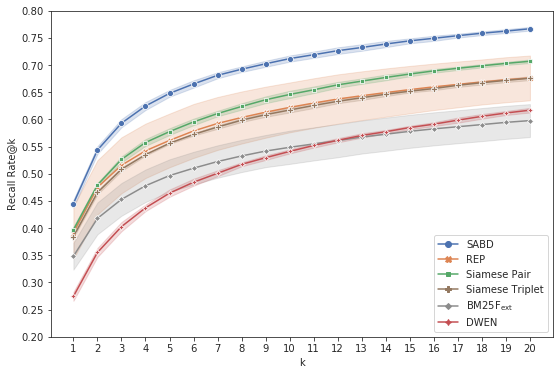

In [106]:
labels =[]
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
    [0.403873,0.481533,0.518866,0.543222,0.564184,0.578159,0.588541,0.599721,0.608505,0.616690,0.623877,0.630266,0.636454,0.641246,0.646636,0.651427,0.655420,0.659213,0.662807,0.665602,],
    [0.328808,0.397285,0.430425,0.454182,0.474945,0.489120,0.500100,0.509882,0.519465,0.526652,0.532841,0.537433,0.544220,0.551208,0.556199,0.560591,0.564584,0.568177,0.572769,0.577960,],
    [0.376522,0.455780,0.492513,0.518866,0.534837,0.549810,0.563186,0.572170,0.581354,0.590936,0.595728,0.601917,0.608704,0.615891,0.620683,0.624676,0.628069,0.632262,0.636854,0.640447,],
    [0.342384,0.412657,0.444400,0.470353,0.488321,0.503494,0.515672,0.526253,0.534238,0.540427,0.546816,0.552406,0.558195,0.563386,0.568577,0.574765,0.578758,0.583949,0.590138,0.592533,],
    [0.334598,0.400679,0.434817,0.462368,0.480335,0.495308,0.507287,0.517868,0.525055,0.530844,0.536834,0.544819,0.551208,0.556997,0.564184,0.568976,0.572769,0.576562,0.579357,0.582152,],
    [0.323418,0.385107,0.421841,0.446596,0.465961,0.481334,0.493512,0.505889,0.515871,0.522260,0.529846,0.535636,0.543023,0.548612,0.554402,0.558195,0.562388,0.565183,0.569575,0.572569,],
    [0.335796,0.402875,0.438411,0.465961,0.485127,0.496706,0.509483,0.520663,0.529247,0.535237,0.541226,0.547015,0.555001,0.559193,0.564584,0.569375,0.572769,0.576562,0.580555,0.582551,],
    [0.340587,0.409663,0.445798,0.470753,0.487722,0.499501,0.512877,0.521861,0.533041,0.539030,0.545818,0.551607,0.559393,0.563586,0.567778,0.571970,0.575364,0.579557,0.583350,0.586944,],
    [0.354961,0.424436,0.457377,0.476742,0.496107,0.508884,0.520264,0.529846,0.538830,0.547015,0.552006,0.556997,0.561389,0.564983,0.570174,0.574366,0.578958,0.583150,0.586345,0.590337,],
    [0.340387,0.408265,0.443402,0.469355,0.488321,0.499501,0.513276,0.522859,0.531244,0.536634,0.543422,0.550409,0.557197,0.561789,0.566780,0.570972,0.575564,0.579158,0.582951,0.586145,]
    
]),
'REP': np.asarray([
    [0.268117,0.347774,0.386704,0.418048,0.440807,0.458974,0.474945,0.487722,0.500499,0.514075,0.523458,0.532042,0.539030,0.546616,0.553803,0.561589,0.567778,0.574167,0.580355,0.585346,],
    [0.388700,0.468557,0.508884,0.534039,0.551407,0.567778,0.582951,0.596127,0.606109,0.613895,0.621481,0.629267,0.636055,0.640846,0.647235,0.652226,0.655620,0.659812,0.662008,0.663206,],
    [0.433420,0.517868,0.562587,0.590138,0.607307,0.627071,0.639449,0.648632,0.658614,0.669395,0.677580,0.684168,0.689359,0.695748,0.700739,0.704532,0.708525,0.712517,0.718507,0.720902,],
    [0.397285,0.482531,0.523058,0.547415,0.566381,0.582352,0.595728,0.605510,0.614494,0.622080,0.628668,0.635656,0.641845,0.646836,0.653025,0.657816,0.663406,0.667798,0.670793,0.674386,],
    [0.437812,0.519665,0.561589,0.588541,0.609104,0.629467,0.641246,0.652226,0.660811,0.668796,0.676183,0.684168,0.689559,0.695348,0.699940,0.705131,0.709722,0.713316,0.717309,0.721701,],
    [0.435416,0.520663,0.566979,0.591935,0.613096,0.628868,0.643442,0.654222,0.663606,0.671791,0.680974,0.688760,0.694749,0.699940,0.703534,0.708125,0.711120,0.715512,0.721302,0.725294,],
    [0.389699,0.470753,0.508884,0.537033,0.555201,0.573368,0.586944,0.599321,0.606708,0.613096,0.620084,0.625474,0.633260,0.639050,0.645239,0.651427,0.656219,0.660411,0.664204,0.667199,],
    [0.386904,0.470154,0.508684,0.536634,0.554003,0.568577,0.583550,0.593731,0.603713,0.611300,0.620283,0.628269,0.634258,0.640447,0.644240,0.649631,0.654422,0.659014,0.661010,0.665402,],
    [0.386904,0.468956,0.507886,0.533839,0.550609,0.567778,0.581553,0.594530,0.604113,0.613096,0.620283,0.627271,0.633060,0.638052,0.643242,0.647235,0.650429,0.656019,0.660411,0.663206,],
    [0.392693,0.482531,0.519665,0.543422,0.564584,0.582352,0.594929,0.602116,0.613296,0.622679,0.631064,0.638850,0.643442,0.649830,0.656219,0.660411,0.665402,0.669195,0.672989,0.675784,],

    ]),
'DWEN': np.asarray([
   [0.27550409263326014, 0.352365741665003, 0.398283090437213, 0.4352166101018167, 0.46396486324615693, 0.48412856857656217, 0.5000998203234178, 0.5162707127171092, 0.5278498702335795, 0.540626871631064, 0.5480135755639848, 0.5595927330804552, 0.5679776402475544, 0.5749650628868037, 0.5829506887602316, 0.5899381113994809, 0.5951287682172091, 0.6029147534438012, 0.6097025354362148, 0.6146935516071073],
   [0.2609303254142543, 0.3427829906168896, 0.39069674585745656, 0.42962667199041726, 0.4577760031942503, 0.4789379117588341, 0.49391096027151127, 0.5122778997803953, 0.5232581353563586, 0.5352365741665003, 0.5478139349171491, 0.5559992014374127, 0.5657815931323618, 0.5737672190057895, 0.5825514074665602, 0.5873427829906169, 0.5951287682172091, 0.6015172689159513, 0.6073068476741864, 0.6128967857855859],
   [0.27829906168895985, 0.36354561788780193, 0.4128568576562188, 0.44619684567778, 0.4743461768816131, 0.49391096027151127, 0.5076861649031743, 0.5204631663006588, 0.5330405270513077, 0.5444200439209423, 0.5555999201437413, 0.564983030545019, 0.5749650628868037, 0.5809542822918746, 0.5883409862247954, 0.5945298462767019, 0.6035136753843082, 0.608903972848872, 0.6152924735476143, 0.6214813335995208],
    [0.27430624875224596, 0.354961070073867, 0.4036733879017768, 0.4360151726891595, 0.4587742064284288, 0.4781393491714913, 0.4979037732082252, 0.5160710720702735, 0.5294469954082651, 0.5404272309842284, 0.5522060291475345, 0.5617887801956478, 0.5689758434817329, 0.5761629067678179, 0.5823517668197244, 0.5887402675184668, 0.5951287682172091, 0.6029147534438012, 0.6103014573767219, 0.6136953483729287],
    [0.2828907965661809, 0.3619484927131164, 0.4076662008384907, 0.4388101417448593, 0.46656019165502094, 0.48672389698542623, 0.5044919145538032, 0.521062088241166, 0.5338390896386505, 0.5444200439209423, 0.5559992014374127, 0.5651826711918546, 0.5741665002994609, 0.5805550009982032, 0.5887402675184668, 0.5953284088640447, 0.6039129566779796, 0.6114993012577361, 0.6158913954881213, 0.6216809742463566],
    ]),
'Siamese Pair':np.asarray([
    [0.3892992613296067, 0.4789379117588341, 0.5266520263525654, 0.5552006388500699, 0.5761629067678179, 0.5945298462767019, 0.608903972848872, 0.6216809742463566, 0.6336594130564983, 0.6458374925134758, 0.652225993212218, 0.6616091036134957, 0.667997604312238, 0.6743861050109803, 0.6807746057097225, 0.6855659812337792, 0.6905569974046716, 0.6941505290477141, 0.6989419045717709, 0.7021361549211419],
    [0.3932920742663206, 0.47314833300059894, 0.5174685565981234, 0.5478139349171491, 0.5671790776602116, 0.5851467358754242, 0.6027151127969654, 0.6148931922539429, 0.626671990417249, 0.6344579756438411, 0.645038929926133, 0.6562188061489319, 0.6646037133160312, 0.6713914953084448, 0.6789778398882013, 0.686364543821122, 0.6913555599920144, 0.6979437013375923, 0.7019365142743063, 0.7063286085046916],
    [0.4040726691954482, 0.4833300059892194, 0.5316430425234577, 0.562986624076662, 0.5817528448792174, 0.5981233779197445, 0.6124975044919145, 0.6242763026552206, 0.6378518666400479, 0.64703533639449, 0.6560191655020963, 0.6622080255540028, 0.6687961668995808, 0.6757835895388301, 0.6827710121780795, 0.6891595128768218, 0.6933519664603713, 0.6983429826312637, 0.7025354362148133, 0.7059293272110202],
    [0.39708524655619887, 0.48093431822719107, 0.526252745058894, 0.5581952485526053, 0.5803553603513676, 0.5989219405070872, 0.6148931922539429, 0.6274705530045918, 0.6390497105210621, 0.6498303054501896, 0.6576162906767818, 0.6667997604312238, 0.6721900578957876, 0.6787781992413655, 0.6845677779996007, 0.6907566380515073, 0.6967458574565781, 0.700139748452785, 0.705330405270513, 0.7095228588540626],
    [0.40027949690556996, 0.4797364743461769, 0.5296466360551009, 0.5627869834298264, 0.581952485526053, 0.5999201437412657, 0.6144939109602715, 0.6302655220602915, 0.643042523457776, 0.6518267119185466, 0.6610101816729886, 0.6703932920742663, 0.6779796366540227, 0.6851666999401078, 0.6897584348173288, 0.6941505290477141, 0.6977440606907567, 0.7023357955679776, 0.7061289678578558, 0.7105210620882412],
    ]),
'Siamese Triplet': np.asarray([
    [0.3847075264523857, 0.4699540826512278, 0.5100818526652027, 0.535436214813336, 0.5546017169095628, 0.5697744060690757, 0.5815532042323817, 0.5939309243361949, 0.603713316031144, 0.6101018167298862, 0.6188860051906568, 0.629267318826113, 0.6346576162906767, 0.6412457576362547, 0.6482331802755041, 0.6524256338590537, 0.6578159313236175, 0.6618087442603314, 0.6662008384907168, 0.669994010780595],
    [0.38311040127770013, 0.46416450389299263, 0.5040926332601318, 0.5338390896386505, 0.556398482731084, 0.5733679377121181, 0.5883409862247954, 0.5983230185665801, 0.608903972848872, 0.620083849071671, 0.6276701936514274, 0.6346576162906767, 0.640447195048912, 0.6478338989818327, 0.6526252745058894, 0.6596126971451387, 0.665402275903374, 0.670592932721102, 0.6735875424236375, 0.6783789179476941],
    [0.38271111998402874, 0.46675983230185664, 0.512477540427231, 0.5376322619285286, 0.5567977640247554, 0.5719704531842683, 0.5831503294070672, 0.5965262527450589, 0.605709722499501, 0.6150928329007787, 0.6224795368336994, 0.6294669594729487, 0.6370533040527051, 0.6446396486324616, 0.6504292273906968, 0.6546216809742463, 0.6612098223198243, 0.6677979636654022, 0.6721900578957876, 0.6759832301856658],
    [0.38790177680175686, 0.4609702535436215, 0.505889399081653, 0.5330405270513077, 0.5548013575563985, 0.5709722499500899, 0.587941704931124, 0.6021161908564584, 0.6122978638450789, 0.6194849271311639, 0.6290676781792773, 0.6358554601716909, 0.6420443202235975, 0.64703533639449, 0.6538231183869035, 0.6582152126172889, 0.664004791375524, 0.6683968856059094, 0.6721900578957876, 0.6753843082451587],
    [0.3835096825713715, 0.4655619884208425, 0.5086843681373527, 0.5356358554601717, 0.5579956079057696, 0.5753643441804751, 0.5889399081653025, 0.6015172689159513, 0.6124975044919145, 0.6212816929526852, 0.6296666001197844, 0.6366540227590337, 0.6448392892792972, 0.6506288680375324, 0.6540227590337393, 0.6586144939109603, 0.6650029946097026, 0.668596526252745, 0.6745857456578159, 0.6787781992413655],

]),
'DBR-CNN': np.asarray([
[0.21581153922938712, 0.2810940307446596, 0.32621281692952686, 0.35096825713715313, 0.37013375923337993, 0.3888999800359353, 0.4036733879017768, 0.4162507486524256, 0.4274306248752246, 0.4364144539828309, 0.44479936114993013, 0.45238570572968656, 0.4593731283689359, 0.46416450389299263, 0.4697544420043921, 0.47594330205629864, 0.4807346775803554, 0.48612497504491914, 0.4919145538031543, 0.49510880415252545],
 [0.0890397284887203, 0.12896785785585946, 0.1557197045318427, 0.17029347175084847, 0.18047514473946896, 0.1928528648432821, 0.20363345977240965, 0.21301657017368736, 0.22000399281293673, 0.22679177480535037, 0.23218207226991416, 0.23797165102814932, 0.24336194849271311, 0.2499500898382911, 0.25514074665601916, 0.2595328408864045, 0.26572170093831105, 0.2707127171092034, 0.27530445198642445, 0.2806947494509882],
 [0.21760830505090836, 0.2816929526851667, 0.3230185665801557, 0.3465761629067678, 0.36893591535236575, 0.38730285486124977, 0.4036733879017768, 0.41505290477141144, 0.4276302655220603, 0.4410061888600519, 0.4453982830904372, 0.45358354961070074, 0.46216809742463566, 0.4689558794170493, 0.47534438011579155, 0.48113395887402677, 0.48532641245757635, 0.4915152725094829, 0.4971052106208824, 0.5022958674386105],
 [0.08364943102415652, 0.1221800758634458, 0.14394090636853663, 0.15611898582551406, 0.16590137752046316, 0.17468556598123378, 0.1818726292673188, 0.18985825514074667, 0.19584747454581752, 0.20083849071670992, 0.20582950688760232, 0.21002196047115193, 0.21421441405470154, 0.21880614893192254, 0.22200039928129367, 0.2249950089838291, 0.2295867438610501, 0.2339788380914354, 0.2385705729686564, 0.24176482331802754],
 [0.23777201038131363, 0.30624875224595727, 0.3471750848472749, 0.3737272908764224, 0.3978838091435416, 0.4132561389498902, 0.4276302655220603, 0.4374126572170094, 0.4475943302056299, 0.4567777999600719, 0.46596126971451385, 0.47394689558794173, 0.4789379117588341, 0.48532641245757635, 0.49071670992214017, 0.49510880415252545, 0.4997005390297465, 0.5052904771411459, 0.5092832900778599, 0.5120782591335596]]), 
'SABD': np.asarray([
    [0.4378119385106808, 0.5362347774006788, 0.5847474545817528, 0.618087442603314, 0.6434418047514474, 0.6596126971451387, 0.6781792773008585, 0.688959872229986, 0.6967458574565781, 0.705330405270513, 0.7129167498502695, 0.7207027350768617, 0.7270912357756039, 0.7330804551806748, 0.7404671591135955, 0.7448592533439808, 0.7510481133958874, 0.7568376921541226, 0.7602315831503295, 0.7640247554402076],
    [0.4479936114993013, 0.5530045917348773, 0.6025154721501298, 0.6344579756438411, 0.6548213216210821, 0.6737871830704731, 0.6879616689958076, 0.6965462168097425, 0.7057296865641844, 0.7145138750249551, 0.7221002196047115, 0.7284887203034538, 0.7344779397085247, 0.7410660810541027, 0.7466560191655021, 0.7518466759832302, 0.7556398482731084, 0.7610301457376721, 0.7640247554402076, 0.768416849670593],
    [0.4372130165701737, 0.5366340586943502, 0.585945298462767, 0.6172888800159713, 0.6416450389299261, 0.6584148532641245, 0.6757835895388301, 0.6865641844679576, 0.6973447793970853, 0.7075264523857058, 0.7147135156717908, 0.7228987821920543, 0.7278897983629466, 0.7344779397085247, 0.7398682371730885, 0.744060690756638, 0.7502495508085446, 0.7538430824515872, 0.7588340986224795, 0.7636254741465363],
    [0.4493910960271511, 0.5450189658614494, 0.5947294869235377, 0.6238770213615492, 0.645038929926133, 0.663405869435017, 0.6773807147135157, 0.6905569974046716, 0.7017368736274705, 0.7117189059692554, 0.7175084847274905, 0.7234977041325614, 0.7298862048313036, 0.7370732681173887, 0.7444599720503094, 0.7494509882212018, 0.7538430824515872, 0.7578358953883011, 0.7610301457376721, 0.7658215212617289],
    [0.45258534637652226, 0.5468157316829707, 0.5967258933918946, 0.6290676781792773, 0.6542223996805749, 0.6703932920742663, 0.6859652625274506, 0.6985426232780995, 0.7097224995008984, 0.7197045318426831, 0.7272908764224396, 0.7360750648832102, 0.7416650029946097, 0.7472549411060092, 0.7508484727490518, 0.7554402076262727, 0.7590337392693153, 0.7626272709123577, 0.7676182870832502, 0.771611100019964]
]),
}
    
        
order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res, order))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.20, 0.8))

fig = ax.get_figure()
fig.savefig("plots/netbeans_365.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [90]:
bm25f_map = np.asarray([0.478782, 0.398161, 0.452013, 0.412084, 0.403473, 0.39134, 0.39134, 0.410354, 0.422286, 0.409618])
rep_map = np.asarray([0.352444, 0.466809, 0.515626, 0.47739, 0.518216, 0.518348, 0.468441, 0.46651, 0.465651, 0.474688])
dwen_map = np.asarray([0.36387289118302724, 0.3535129374659895, 0.37028898182570724, 0.3640580046782582, 0.37107570732029665])
siamese_pairs_map = np.asarray([0.478040003651284, 0.47698801263085316, 0.487547377038923, 0.48338179312054347, 0.4855874403574827])
siamese_triplets_map = np.asarray([0.46603063782553655, 0.4647639170917105, 0.4655381851967987, 0.4667808769529801, 0.46598928037577175])
sabd_map = np.asarray([0.5318317317727831, 0.5436736406708562, 0.5314939673187262, 0.540626896574922, 0.5444649817593783])



data = [
    ["DWEN", dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets_map.mean(), siamese_triplets_map.std()],
    ["Siamese Pairs", siamese_pairs_map.mean(), siamese_pairs_map.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()],
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen = bm25f_map = siamese_pair_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.365[0.006]
0.417[0.027]
0.466[0.001]
0.482[0.004]
0.472[0.045]
0.538[0.006]



,Method,MAP - Mean,STD
0,DWEN,0.364562,0.006293
1,BM25F,0.416945,0.026549
2,Siamese Triplets,0.465821,0.000662
3,Siamese Pairs,0.482309,0.004144
4,REP,0.472412,0.045415
5,SABD,0.538418,0.005664


### *Window - 3 years*


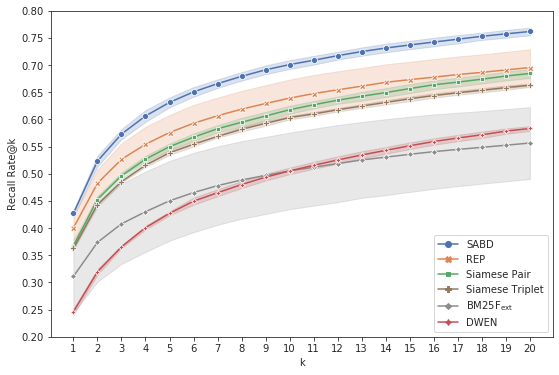

In [107]:
labels =[]
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
     [0.338790,0.398283,0.434618,0.455780,0.473148,0.489519,0.500898,0.511080,0.518067,0.527251,0.533639,0.540028,0.544220,0.549810,0.555001,0.560192,0.563785,0.567379,0.572170,0.575364,],
    [0.358355,0.427431,0.459173,0.483130,0.501098,0.514474,0.523458,0.533839,0.541425,0.547814,0.553404,0.558395,0.565981,0.570972,0.574167,0.576762,0.579357,0.583150,0.587942,0.592533,],
    [0.132561,0.185267,0.215812,0.239968,0.261929,0.277900,0.292274,0.305251,0.315233,0.324616,0.331004,0.337592,0.347375,0.352765,0.359553,0.366740,0.374725,0.380116,0.384907,0.389299,],
    [0.316830,0.377520,0.412058,0.434218,0.454182,0.470154,0.481733,0.492114,0.502296,0.510281,0.518067,0.524656,0.530844,0.536035,0.541226,0.546017,0.550809,0.553803,0.557397,0.560791,],
    [0.311040,0.369335,0.403074,0.423637,0.443602,0.457976,0.473747,0.483530,0.490916,0.500898,0.507087,0.515273,0.523857,0.528848,0.533839,0.537433,0.540427,0.544220,0.547614,0.551807],
    [0.333200,0.398882,0.433220,0.455181,0.473148,0.486924,0.499301,0.508285,0.515871,0.523657,0.529846,0.538032,0.545618,0.549611,0.554602,0.558794,0.561789,0.565582,0.568377,0.572569,],
    [0.383709,0.459373,0.497504,0.524855,0.545818,0.561389,0.573967,0.584149,0.593931,0.601517,0.610501,0.618487,0.623877,0.629866,0.635057,0.640048,0.645638,0.647834,0.650629,0.653823,],
    [0.312238,0.378918,0.412458,0.430026,0.455580,0.469355,0.483130,0.492913,0.501098,0.511080,0.517269,0.522060,0.530645,0.534438,0.540028,0.545618,0.548213,0.552206,0.556199,0.559992,],
    [0.308644,0.367538,0.402276,0.423238,0.444200,0.459173,0.472150,0.482731,0.492314,0.498902,0.505690,0.513276,0.518067,0.523857,0.530046,0.535636,0.539429,0.543023,0.546017,0.552006,],
    [0.315432,0.373927,0.408065,0.430625,0.448792,0.466361,0.480136,0.491316,0.497305,0.506688,0.513076,0.518666,0.522859,0.528648,0.534039,0.538630,0.543222,0.547614,0.553204,0.556398,],

]),
'REP': np.asarray([
    [0.420443,0.506289,0.553604,0.584149,0.606309,0.624077,0.638451,0.650629,0.660411,0.670593,0.680974,0.687163,0.693152,0.700739,0.705131,0.708724,0.713516,0.717309,0.721501,0.726692,],
    [0.374526,0.449191,0.488121,0.511879,0.534438,0.550210,0.565382,0.577161,0.587143,0.597524,0.605111,0.612697,0.620084,0.627071,0.631463,0.635855,0.641246,0.644041,0.648632,0.654023,],
    [0.404073,0.487922,0.535436,0.562587,0.588141,0.606908,0.620283,0.630864,0.641046,0.651427,0.658215,0.666800,0.673188,0.680176,0.685766,0.691555,0.695149,0.699341,0.703933,0.708325,],
    [0.376722,0.460172,0.500699,0.523657,0.544220,0.557197,0.571172,0.579557,0.589339,0.597125,0.606708,0.615093,0.623677,0.632062,0.635656,0.639249,0.643043,0.648433,0.652026,0.655620,],
    [0.420443,0.505690,0.553204,0.581952,0.603314,0.619285,0.632661,0.646636,0.657017,0.666600,0.677381,0.685167,0.689958,0.695348,0.701138,0.705330,0.711719,0.714714,0.719705,0.725294,],
    [0.415053,0.499501,0.546816,0.578159,0.601118,0.620483,0.633659,0.647235,0.658814,0.667399,0.675784,0.681374,0.686963,0.694151,0.697145,0.701937,0.706728,0.710521,0.716111,0.721701,],
    [0.420244,0.503893,0.550010,0.584548,0.602915,0.620084,0.634458,0.645039,0.655620,0.666201,0.672789,0.678579,0.686365,0.691954,0.697345,0.702535,0.707526,0.711519,0.716910,0.720303,],
    [0.418646,0.504492,0.553005,0.579956,0.600319,0.621282,0.633859,0.646436,0.657017,0.668597,0.675983,0.683769,0.690956,0.698543,0.702735,0.708724,0.712717,0.717508,0.720303,0.724097,],
    [0.375923,0.452585,0.492114,0.516670,0.538231,0.553803,0.568377,0.580555,0.591735,0.602316,0.611100,0.616690,0.622879,0.631064,0.637852,0.640846,0.646037,0.650829,0.655221,0.658415,],
    [0.376323,0.453983,0.491316,0.518067,0.538630,0.554602,0.568577,0.582951,0.593731,0.602715,0.610301,0.616890,0.623478,0.630465,0.636654,0.641445,0.646636,0.650230,0.654821,0.659213],
    ]),
'DWEN':np.asarray([
     [0.2495508085446197, 0.3196246755839489, 0.3653423837093232, 0.3992812936713915, 0.42962667199041726, 0.45418247155120783, 0.4705530045917349, 0.4835296466360551, 0.49630664803353963, 0.505889399081653, 0.5154721501297664, 0.5256538231183869, 0.5344380115791575, 0.5450189658614494, 0.5520063885006987, 0.5599920143741266, 0.5667797963665402, 0.5741665002994609, 0.5811539229387104, 0.5865442204032741],
    [0.2397684168496706, 0.31643042523457776, 0.3643441804751447, 0.4036733879017768, 0.4282291874625674, 0.44859253343980837, 0.46136953483729287, 0.47574366140946295, 0.4877221002196047, 0.5026951487322819, 0.512477540427231, 0.5204631663006588, 0.5278498702335795, 0.5376322619285286, 0.546616091036135, 0.55380315432222, 0.5613894989019764, 0.5665801557197045, 0.5745657815931323, 0.5821521261728888],
    [0.2537432621281693, 0.3286085046915552, 0.36973447793970854, 0.404871231782791, 0.43082451587143145, 0.457975643841086, 0.47354761429427034, 0.4897185066879617, 0.5028947893791176, 0.515072868836095, 0.526252745058894, 0.5366340586943502, 0.5458175284487922, 0.5530045917348773, 0.5617887801956478, 0.5691754841285686, 0.5755639848273109, 0.5809542822918746, 0.5857456578159314, 0.5889399081653025],
    [0.2445597923737273, 0.31603114394090637, 0.3643441804751447, 0.3994809343182272, 0.42503493711319623, 0.44459972050309443, 0.4597724096626073, 0.4771411459373128, 0.49371131962467557, 0.5034937113196247, 0.5142743062487523, 0.5238570572968656, 0.5328408864044719, 0.5394290277500499, 0.5494110600918347, 0.5571970453184268, 0.5621880614893192, 0.5671790776602116, 0.5743661409462967, 0.5781593132361749],
    [0.24296266719904172, 0.31682970652824916, 0.3639448991814733, 0.3962866839688561, 0.42184068676382513, 0.44220403274106607, 0.459972050309443, 0.4743461768816131, 0.4879217408664404, 0.498702335795568, 0.5090836494310241, 0.5198642443601518, 0.5314434018766221, 0.5398283090437213, 0.5474146536234777, 0.5559992014374127, 0.5625873427829906, 0.5691754841285686, 0.5759632661209823, 0.5803553603513676],
    ]),
'Siamese Pair':np.asarray([
      [0.36813735276502296, 0.4471950489119585, 0.49470952285885406, 0.5232581353563586, 0.5486124975044919, 0.5659812337791974, 0.580754641645039, 0.5907366739868237, 0.603713316031144, 0.6158913954881213, 0.6248752245957276, 0.6330604911159912, 0.6392493511678978, 0.6472349770413256, 0.6532241964463965, 0.6594130564983031, 0.6644040726691954, 0.6709922140147734, 0.6757835895388301, 0.6803753244160511],
      [0.3761229786384508, 0.459972050309443, 0.5018965861449391, 0.5324416051108005, 0.5546017169095628, 0.5697744060690757, 0.5873427829906169, 0.6005190656817728, 0.6105010980235576, 0.6204831303653424, 0.629267318826113, 0.6364543821121981, 0.645038929926133, 0.6518267119185466, 0.6586144939109603, 0.6656019165502096, 0.6693950888400878, 0.6739868237173089, 0.6803753244160511, 0.6853663405869435],
      [0.3619484927131164, 0.4569774406069076, 0.5018965861449391, 0.5334398083449791, 0.5552006388500699, 0.5763625474146536, 0.5917348772210022, 0.605709722499501, 0.6172888800159713, 0.6290676781792773, 0.6374525853463765, 0.6458374925134758, 0.6544220403274107, 0.6616091036134957, 0.6695947294869236, 0.6763825114793371, 0.681772808943901, 0.6871631064084648, 0.6931523258135356, 0.6981433419844281],
      [0.36793771211818727, 0.45358354961070074, 0.49510880415252545, 0.5260531044120583, 0.5498103413855061, 0.5663805150728688, 0.5785585945298463, 0.5901377520463166, 0.6015172689159513, 0.6112996606109004, 0.6230784587742064, 0.6322619285286485, 0.6412457576362547, 0.6462367738071472, 0.6546216809742463, 0.6608105410261529, 0.6664004791375524, 0.6715911359552805, 0.6775803553603513, 0.681772808943901],
      [0.3617488520662807, 0.4449990017967658, 0.4879217408664404, 0.5182671191854662, 0.540626871631064, 0.5577959672589339, 0.5755639848273109, 0.5861449391096027, 0.5981233779197445, 0.6118985825514075, 0.6194849271311639, 0.6288680375324416, 0.6324615691754841, 0.6394489918147335, 0.6472349770413256, 0.6558195248552605, 0.6606109003793172, 0.6658015571970454, 0.6715911359552805, 0.6763825114793371]
    ]),
'Siamese Triplet':np.asarray([
      [0.35915352365741665, 0.4374126572170094, 0.48193252146136956, 0.5118786184867239, 0.5380315432222, 0.5534038730285487, 0.567578358953883, 0.5791575164703534, 0.5899381113994809, 0.6029147534438012, 0.6093032541425434, 0.6170892393691355, 0.622679177480535, 0.6300658814134558, 0.6376522259932123, 0.6432421641046117, 0.6490317428628469, 0.6528249151527251, 0.6592134158514673, 0.6638051507286884],
      [0.3645438211219804, 0.4457975643841086, 0.48632461569175484, 0.519664603713316, 0.5454182471551208, 0.560391295667798, 0.5729686564184467, 0.5875424236374526, 0.5991215811539229, 0.6085046915552006, 0.6148931922539429, 0.6228788181273708, 0.6302655220602915, 0.6376522259932123, 0.6448392892792972, 0.6508285086843681, 0.6544220403274107, 0.6596126971451387, 0.6636055100818526, 0.6671990417248952],
    [0.36334597724096623, 0.4463964863246157, 0.4869235376322619, 0.5158714314234378, 0.5376322619285286, 0.5528049510880415, 0.5683769215412258, 0.583349970053903, 0.5941305649830305, 0.6011179876222799, 0.6081054102615292, 0.6158913954881213, 0.6240766620083849, 0.6310640846476343, 0.6378518666400479, 0.6434418047514474, 0.649630664803354, 0.6548213216210821, 0.6598123377919745, 0.6632062287881813],
    [0.361549211419445, 0.441605110800559, 0.48612497504491914, 0.5166699940107806, 0.5366340586943502, 0.55380315432222, 0.5677779996007187, 0.5801557197045318, 0.5925334398083449, 0.6045118786184868, 0.6114993012577361, 0.6174885206628069, 0.6232780994210422, 0.6286683968856059, 0.6348572569375125, 0.6414453982830904, 0.64703533639449, 0.6516270712717109, 0.6570173687362747, 0.6616091036134957],
    [0.3645438211219804, 0.44380115791575164, 0.48572569375124774, 0.5136753843082451, 0.5350369335196646, 0.5500099820323417, 0.5669794370133759, 0.5783589538830106, 0.5875424236374526, 0.5993212218007586, 0.6059093631463366, 0.6146935516071073, 0.6216809742463566, 0.6282691155919345, 0.633859053703334, 0.6400479137552406, 0.6446396486324616, 0.6490317428628469, 0.6524256338590537, 0.6584148532641245],
    ]),
'DBR-CNN': np.asarray([
[0.08325014973048513, 0.12138151327610301, 0.14294270313435817, 0.1551207825913356, 0.1645038929926133, 0.17288880015971253, 0.178478738271112, 0.1870632860850469, 0.1926532241964464, 0.19604711519265322, 0.20043920942303853, 0.20443202235975244, 0.20862447594330205, 0.21261728888001596, 0.21661010181672988, 0.21980435216610103, 0.22299860251547216, 0.2251946496306648, 0.22798961868636455, 0.23118386903573568],
 [0.08764224396087043, 0.1263725294469954, 0.1511279696546217, 0.16410461169894192, 0.17488520662806947, 0.1836693950888401, 0.19425034937113198, 0.2026352565382312, 0.20962267917748054, 0.21641046116989418, 0.22140147734078658, 0.22719105609902177, 0.23138350968257138, 0.23577560391295668, 0.2391694949091635, 0.24236374525853463, 0.24675583948891994, 0.2497504491914554, 0.2529446995408265, 0.25613894989019764],
 [0.21641046116989418, 0.27789978039528845, 0.31702934717508485, 0.34058694350169694, 0.35795567977640247, 0.3743262128169295, 0.3869035735675784, 0.40067877819924136, 0.41245757636254743, 0.42403673387901775, 0.4290277500499102, 0.4352166101018167, 0.44300259532840885, 0.4495907366739868, 0.4563785186664005, 0.46376522259932124, 0.4689558794170493, 0.4743461768816131, 0.4801357556398483, 0.48532641245757635],
 [0.2339788380914354, 0.299860251547215, 0.33938909962068275, 0.3613495707726093, 0.38051507286883607, 0.3950888400878419, 0.4084647634258335, 0.4190457177081254, 0.4270313435815532, 0.43461768816130963, 0.44240367338790176, 0.450788580555001, 0.4555799560790577, 0.4603713316031144, 0.4651627071271711, 0.4743461768816131, 0.4787382711119984, 0.4831303653423837, 0.48572569375124774, 0.4899181473347974],
 [0.21341585146735875, 0.27490517069275305, 0.3190257536434418, 0.3427829906168896, 0.361549211419445, 0.3771211818726293, 0.39109602715112796, 0.40227590337392694, 0.41145937312836894, 0.42144140547015374, 0.4286284687562388, 0.43481732880814533, 0.4412058295068876, 0.4453982830904372, 0.4497903773208225, 0.455380315432222, 0.46136953483729287, 0.4673587542423637, 0.47175084847274906, 0.47694150529047713]

]),
'SABD': np.asarray([
  [0.43022559393092435, 0.5252545418247155, 0.5723697344779397, 0.6067079257336794, 0.6308644440007986, 0.649630664803354, 0.6612098223198243, 0.6743861050109803, 0.6853663405869435, 0.6969454981034139, 0.705330405270513, 0.7141145937312837, 0.7203034537831903, 0.7270912357756039, 0.7332800958275105, 0.7376721900578957, 0.7410660810541027, 0.7476542223996806, 0.7522459572769016, 0.7578358953883011],
 [0.43302056298662406, 0.5296466360551009, 0.5811539229387104, 0.6142942703134359, 0.6386504292273907, 0.6566180874426033, 0.6721900578957876, 0.6857656218806149, 0.6965462168097425, 0.7069275304451986, 0.7163106408464763, 0.7234977041325614, 0.7332800958275105, 0.7404671591135955, 0.7458574565781593, 0.752645238570573, 0.7574366140946297, 0.7610301457376721, 0.7660211619085646, 0.7708125374326212],
 [0.42323817129167496, 0.5186664004791376, 0.5681772808943901, 0.5995208624475943, 0.627270912357756, 0.6452385705729686, 0.6608105410261529, 0.6739868237173089, 0.686963465761629, 0.6943501696945498, 0.7011379516869635, 0.711319624675584, 0.7189059692553403, 0.7254941106009184, 0.7308844080654822, 0.7362747055300459, 0.7426632062287882, 0.748652425633859, 0.7540427230984228, 0.7582351766819725],
 [0.4192453583549611, 0.5084847274905171, 0.5601916550209622, 0.5917348772210022, 0.6184867238969854, 0.6394489918147335, 0.6584148532641245, 0.6721900578957876, 0.684368137352765, 0.6939508884008784, 0.7023357955679776, 0.7107207027350768, 0.7183070473148333, 0.7238969854262328, 0.729686564184468, 0.7356757835895388, 0.7422639249351168, 0.7476542223996806, 0.7502495508085446, 0.7540427230984228],
 [0.4288281094030745, 0.5338390896386505, 0.5825514074665602, 0.6186863645438211, 0.6408464763425834, 0.6616091036134957, 0.6759832301856658, 0.6893591535236574, 0.702735076861649, 0.7117189059692554, 0.7185066879616689, 0.7262926731882612, 0.7326811738870034, 0.7392693152325813, 0.7444599720503094, 0.7488520662806948, 0.7538430824515872, 0.7592333799161509, 0.7640247554402076, 0.7672190057895788]
])
}

        
order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax= sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False,  data=convert2dataframe(recall_rate_res, order))
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.20, 0.8))

fig = ax.get_figure()
fig.savefig("plots/netbeans_1095.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [92]:
bm25f_map = np.asarray([0.403155, 0.425639, 0.196641, 0.382602, 0.375211, 0.380005, 0.373643, 0.380496, 0.4598, 0.400079])
rep_map = np.asarray([0.506905, 0.451012, 0.489483, 0.456593, 0.505983, 0.454264, 0.453767, 0.50477, 0.505199, 0.501367])
dwen_map = np.asarray([0.3353208117050194, 0.32896661267981564, 0.34047909371252616, 0.3310459602723169, 0.329808257098219])
siamese_pairs_map = np.asarray([0.4530053630646582, 0.46127766146661203, 0.4551320316249787, 0.45420937275048784, 0.44773623584225036])
siamese_triplets_map = np.asarray([0.44230342933416905, 0.44851170174223504, 0.4466192458826044, 0.4446428757132538, 0.44603059894327657])
sabd_map = np.asarray([0.5233253586465454, 0.5284855384965064, 0.5176572511554451, 0.5122126448796084, 0.5275886729998386])


data = [
    ["DWEN",dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets_map.mean(), siamese_triplets_map.std()],
    ["Siamese Pair", siamese_pairs_map.mean(), siamese_pairs_map.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["CADD", sabd_map.mean(), sabd_map.std()],
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen_map = bm25f_map = siamese_pairs_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.333[0.004]
0.378[0.066]
0.446[0.002]
0.454[0.004]
0.483[0.024]
0.522[0.006]



,Method,MAP - Mean,STD
0,DWEN,0.333124,0.004278
1,BM25F,0.377727,0.065597
2,Siamese Triplets,0.445622,0.002073
3,Siamese Pair,0.454272,0.004339
4,REP,0.482934,0.024180
5,CADD,0.521854,0.006158


# **Mozilla**


### *Window - 1 years*

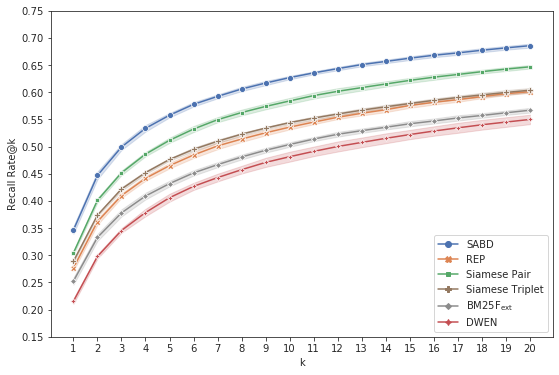

In [99]:
labels =[]
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
    [0.252551,0.333780,0.377899,0.408308,0.430574,0.450572,0.466653,0.480466,0.493970,0.503247,0.514277,0.522833,0.528811,0.533553,0.540769,0.545511,0.551283,0.555510,0.560561,0.564684,],
    [0.251520,0.331512,0.377487,0.407071,0.430368,0.449541,0.464901,0.479126,0.492114,0.502010,0.512421,0.521183,0.528502,0.535615,0.543552,0.548397,0.553345,0.557571,0.562725,0.567364,],
    [0.242758,0.323575,0.368003,0.401093,0.425420,0.446243,0.461190,0.475209,0.487269,0.498815,0.508401,0.516648,0.523245,0.529739,0.534172,0.539841,0.545305,0.551077,0.556437,0.560973,],
    [0.260592,0.341511,0.386249,0.418204,0.439645,0.459540,0.473869,0.487682,0.499330,0.510463,0.518709,0.528915,0.534378,0.540357,0.547160,0.552108,0.558808,0.562725,0.567261,0.572724,],
    [0.254201,0.333574,0.380167,0.410061,0.433151,0.451706,0.466550,0.481497,0.493145,0.504072,0.514792,0.523348,0.530976,0.537986,0.543861,0.549119,0.554479,0.558911,0.563447,0.568292,],
]),
'REP': np.asarray([
      [0.270075,0.355737,0.405731,0.436141,0.458613,0.477992,0.495001,0.507989,0.519637,0.530255,0.540975,0.550253,0.557674,0.563138,0.570972,0.576435,0.581383,0.588290,0.594166,0.597877,],
    [0.282651,0.367797,0.414184,0.444903,0.469436,0.490053,0.507473,0.519534,0.529842,0.540254,0.548603,0.556953,0.563962,0.571178,0.578806,0.585197,0.590867,0.595918,0.600350,0.603134,],
    [0.275539,0.361715,0.408412,0.440470,0.463457,0.482940,0.499433,0.513246,0.525410,0.536336,0.545820,0.553757,0.560973,0.567158,0.575095,0.581280,0.586125,0.591382,0.596949,0.600557,],
    [0.273786,0.356767,0.406350,0.439130,0.462117,0.480981,0.496238,0.509329,0.521493,0.532316,0.540769,0.550871,0.556953,0.563962,0.571900,0.577982,0.583342,0.589939,0.595609,0.600247,],
    [0.280074,0.366972,0.413978,0.446964,0.470776,0.490362,0.507680,0.518812,0.530255,0.539223,0.548809,0.557365,0.566540,0.573446,0.581177,0.586331,0.589939,0.593959,0.598907,0.602928,],

    ]),
'DWEN':np.asarray([
    [0.20987527059066075, 0.2949180496855994, 0.34254200597876505, 0.3757344603649108, 0.40315431398824864, 0.42459540253582106, 0.4407793011029791, 0.45448922791464796, 0.468508401195753, 0.4786104525306669, 0.4884032573961447, 0.49778373363570766, 0.5057210596845686, 0.5134522214204721, 0.5200494794351098, 0.5277806411710133, 0.5337594062467786, 0.5389135140707143, 0.5438614575816926, 0.5482939903102773],
    [0.21533862488403258, 0.2985259251623544, 0.349757756932275, 0.3867642511081332, 0.41408102257499224, 0.4333573858365117, 0.45067518812493557, 0.4651066900319555, 0.47943510978249665, 0.49067106483867645, 0.5005669518606329, 0.5103597567261107, 0.5169570147407484, 0.5244820121636945, 0.5313885166477683, 0.5371611174105763, 0.5431398824863416, 0.5487063189361922, 0.5536542624471704, 0.5582929594887125],
    [0.2147201319451603, 0.2946088032161633, 0.34130502010102054, 0.3708895990104113, 0.39727863106896194, 0.4186166374600557, 0.4341820430883414, 0.44912895577775486, 0.4601587465209772, 0.4698484692299763, 0.4802597670343264, 0.48850633955262346, 0.49613441913204825, 0.5033501700855582, 0.5112874961344192, 0.5168539325842697, 0.5219049582517267, 0.5279868054839707, 0.5331409133079064, 0.5383981032883208],
    [0.22131738995979797, 0.3031646222038965, 0.34852077105453044, 0.38099165034532523, 0.4089269147510566, 0.430368003298629, 0.44593340892691474, 0.46098340377280694, 0.4753118235233481, 0.486135449953613, 0.49520667972373983, 0.5036594165549944, 0.5115967426038552, 0.51922482218328, 0.5255128337284816, 0.532213173899598, 0.5388104319142356, 0.5445830326770436, 0.5494278940315431, 0.5543758375425214],

]), 
'Siamese Pair':np.asarray([
    [0.3053293474899495, 0.40088650654571695, 0.450881352437893, 0.48644469642304916, 0.5087104422224513, 0.5300484486135449, 0.5488094010926708, 0.559942273992372, 0.5714874755179878, 0.5815895268529018, 0.5917946603442944, 0.6010720544273787, 0.6091124626327182, 0.6163282135862282, 0.6223069786619936, 0.628285743737759, 0.6329244407793011, 0.6365323162560561, 0.6412740954540769, 0.6462220389650551],
    [0.30739099061952374, 0.4052159571178229, 0.4569631996701371, 0.49242346149881455, 0.5194309864962375, 0.541181321513246, 0.5560251520461809, 0.5709720647355943, 0.5815895268529018, 0.591588496031337, 0.6009689722709, 0.6098340377280693, 0.6155035563343985, 0.6209669106277703, 0.6280795794248015, 0.6342645088135244, 0.6378723842902794, 0.642304917018864, 0.6471497783733635, 0.6504484073806824],
    [0.30069065044840737, 0.40202041026698276, 0.451602927533244, 0.4844861354499536, 0.5125244820121637, 0.5336563240903, 0.5513864550046387, 0.5639624780950417, 0.5748891866817853, 0.5864343882074013, 0.5968456860117514, 0.6030306154004742, 0.6098340377280693, 0.6169467065251005, 0.6227193072879085, 0.6295227296155036, 0.6348830017523966, 0.6404494382022472, 0.645191217400268, 0.6493145036594166],
    [0.3011029790743222, 0.39490774146995156, 0.4455210803009999, 0.4818059993815071, 0.5082981135965364, 0.5289145448922792, 0.5472631687454902, 0.5611792598701165, 0.5740645294299557, 0.5831357592000824, 0.5931347283785177, 0.6000412328625915, 0.6068446551901866, 0.6133388310483455, 0.620039171219462, 0.6247809504174827, 0.62900731883311, 0.6356045768477476, 0.6403463560457685, 0.644469642304917],
    [0.3064632512112153, 0.4023296567364189, 0.4531491598804247, 0.48479538191938976, 0.5085042779094938, 0.527162148232141, 0.543346046799299, 0.5568498092980105, 0.5669518606329245, 0.5767446654984022, 0.5860220595814865, 0.5938563034738686, 0.6008658901144212, 0.607772394598495, 0.6152973920214411, 0.6211730749407277, 0.6280795794248015, 0.6338521801876095, 0.638387795072673, 0.6429234099577363],
    ]),
'Siamese Triplet':np.asarray([
    [0.2886300381403979, 0.3718173384187197, 0.4173796515823111, 0.44912895577775486, 0.4731470982372951, 0.4915988042469848, 0.5065457169363983, 0.5191217400268013, 0.5311823523348108, 0.5403566642614164, 0.5493248118750644, 0.5558189877332234, 0.5630347386867334, 0.5694258323884136, 0.5761261725595299, 0.5811771982269869, 0.5870528811462736, 0.5916915781878157, 0.5960210287599217, 0.5999381507061128],
    [0.28615606638490876, 0.3754252138954747, 0.4222245129368106, 0.45119059890732915, 0.47551798783630556, 0.4937635295330378, 0.5112874961344192, 0.5229357798165137, 0.5340686527162148, 0.5439645397381713, 0.5533450159777342, 0.5601484383053293, 0.567467271415318, 0.5723121327698175, 0.578290897845583, 0.5839604164519122, 0.5893206885888053, 0.5941655499433048, 0.5991134934542831, 0.6035460261828678],
    [0.29100092773940833, 0.37594062467786826, 0.4242861560663849, 0.45438614575816927, 0.47778579527883724, 0.49561900834965467, 0.5108751675085043, 0.5251005051025668, 0.5363364601587465, 0.5470570044325327, 0.5561282342026596, 0.5640655602515204, 0.5718998041439027, 0.5787032264714977, 0.5838573342954334, 0.5900422636841562, 0.5958148644469642, 0.6015874652097722, 0.6068446551901866, 0.6102463663539841],
    [0.2870838057932172, 0.3719204205751984, 0.4197505411813215, 0.4500566951860633, 0.4758272343057417, 0.49304195443768684, 0.5066487990928771, 0.5219049582517267, 0.5330378311514277, 0.5432429646428203, 0.5500463869704154, 0.5595299453664571, 0.5665395320070096, 0.5717967219874239, 0.5776724049067107, 0.5837542521389547, 0.5882898670240181, 0.5929285640655603, 0.5964333573858365, 0.6011751365838574],
    [0.2908978455829296, 0.37387898154829396, 0.42542005978765074, 0.4554169673229564, 0.4790227811565818, 0.49994845892176065, 0.5133491392639934, 0.5247912586331306, 0.5354087207504381, 0.5454076899288733, 0.5530357695082981, 0.5594268632099784, 0.5656117925987012, 0.5736522008040408, 0.580043294505721, 0.5862282238944438, 0.5910730852489434, 0.5946809607256984, 0.5991134934542831, 0.6031336975569529],
    ]),

'SABD': np.asarray([
    [0.3366663230594784, 0.4372745077827028, 0.492629625811772, 0.5266467374497474, 0.5553035769508298, 0.5743737758993919, 0.5896299350582415, 0.6018967116792083, 0.6130295845789094, 0.6240593753221317, 0.6318936192145139, 0.6395216987939387, 0.6468405319039274, 0.6525100505102567, 0.6581795691165859, 0.663539841253479, 0.6680754561385425, 0.6729203174930419, 0.6777651788475415, 0.6820946294196475],
    [0.35058241418410474, 0.453046077723946, 0.5031440057726008, 0.536542624471704, 0.5605607669312442, 0.5803525409751572, 0.5957117822904855, 0.6090093804762395, 0.6202453355324193, 0.6277703329553654, 0.6363261519430986, 0.6447788887743532, 0.6523038861972993, 0.6583857334295433, 0.663539841253479, 0.6694155241727657, 0.6741573033707865, 0.6784867539428925, 0.6823007937326049, 0.6865271621482322],
    [0.3524378930007216, 0.4526337490980311, 0.5051025667456963, 0.5405628285743738, 0.5613854241830739, 0.5817956911658592, 0.5940624677868261, 0.609215544789197, 0.6198330069065044, 0.6301412225543759, 0.6385939593856303, 0.6465312854344913, 0.6543655293268735, 0.6591073085248943, 0.6652922379136171, 0.6710648386764251, 0.6757035357179673, 0.6802391506030306, 0.684774765488094, 0.6888980517472425],
    [0.34151118441397793, 0.4411916297288939, 0.4942789403154314, 0.527883723327492, 0.5516957014740749, 0.5723121327698175, 0.5873621276157097, 0.601278218740336, 0.612101845170601, 0.6230285537573446, 0.633336769405216, 0.6405525203587259, 0.6479744356251933, 0.6535408720750439, 0.6598288836202454, 0.6645706628182662, 0.6683847026079786, 0.6735388104319142, 0.6780744253169776, 0.6812699721678177],
    [0.3503762498711473, 0.4500566951860633, 0.5000515410782393, 0.5359241315328317, 0.5593237810534997, 0.5794248015668487, 0.5945778785692196, 0.607772394598495, 0.6190083496546748, 0.6291104009895887, 0.6374600556643645, 0.6452942995567468, 0.652406968353778, 0.6593134728378518, 0.6659107308524894, 0.6710648386764251, 0.6749819606226162, 0.6805483970724667, 0.6846716833316153, 0.6890011339037213]    
]),
}
       
order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]

order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax= sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res,order))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.15, 0.75))

fig = ax.get_figure()
fig.savefig("plots/mozilla_365.pdf", format='pdf',bbox_inches='tight', pad_inches=0)

In [94]:
bm25f_map = np.asarray([0.337852, 0.336825, 0.329093, 0.345649, 0.339226])
rep_map = np.asarray([0.359669, 0.370821, 0.36467, 0.362255, 0.369611])
dwen_map = np.asarray([0.30095439538706015, 0.30750656916262625, 0.30160851141188644, 0.3101315273357132])
siamese_pairs_map = np.asarray([0.4008837660983139, 0.4050018297456653, 0.3993933247560879, 0.3970194246694488, 0.4011176834290647])
siamese_triplets_map = np.asarray([0.37477411898622115, 0.37530323964220685, 0.37889104895853803, 0.3747283199410991, 0.3782517866422916])
sabd_map = np.asarray([0.4359641988605213, 0.4479778246255544, 0.4494317045867189, 0.43906673376005867, 0.44699178850918464])



data = [
    ["DWEN",dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets_map.mean(), siamese_triplets_map.std()],
    ["Siamese Pairs", siamese_pairs_map.mean(), siamese_pairs_map.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()]
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen_map = bm25f_map = siamese_pairs_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

0.305[0.004]
0.338[0.005]
0.376[0.002]
0.401[0.003]
0.365[0.004]
0.444[0.005]



,Method,MAP - Mean,STD
0,DWEN,0.305050,0.003888
1,BM25F,0.337729,0.005299
2,Siamese Triplets,0.376390,0.001804
3,Siamese Pairs,0.400683,0.002606
4,REP,0.365405,0.004252
5,SABD,0.443886,0.005350


### *Window - 3 years*


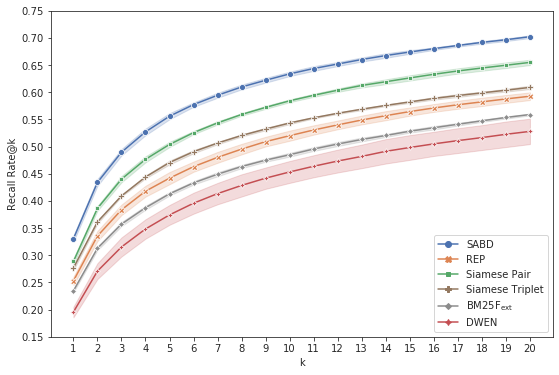

In [100]:
labels =[]
recall_rate_res = {
'$\mathrm{BM25F_{ext}}$':  np.asarray([
    [0.230286,0.307700,0.351613,0.383466,0.409752,0.429234,0.444387,0.459850,0.470673,0.479332,0.489846,0.498918,0.508195,0.516648,0.524482,0.530873,0.537986,0.545408,0.551490,0.558087,],
    [0.235852,0.313988,0.358107,0.387177,0.412638,0.432842,0.448098,0.462323,0.475312,0.485311,0.496031,0.506030,0.513143,0.520462,0.528605,0.534172,0.540563,0.546645,0.552830,0.557881,],
    [0.237295,0.317184,0.362128,0.392949,0.418204,0.437893,0.454798,0.468096,0.478920,0.489022,0.499021,0.508917,0.517472,0.523657,0.531904,0.539326,0.544892,0.550871,0.556850,0.561798,],
    [0.233275,0.311617,0.355943,0.384806,0.411298,0.432017,0.448098,0.461808,0.473972,0.484383,0.495001,0.503453,0.511081,0.518709,0.527059,0.532832,0.540047,0.546232,0.552520,0.557778,],
    [0.235955,0.313576,0.358726,0.388723,0.413153,0.434079,0.450057,0.464179,0.476033,0.486445,0.497371,0.505824,0.514895,0.522214,0.529121,0.535718,0.541594,0.547675,0.553654,0.559015,],

]),
'REP': np.asarray([
    [0.242655,0.324709,0.371817,0.407175,0.429440,0.451500,0.467374,0.482321,0.498093,0.509535,0.521802,0.531285,0.539944,0.547882,0.556644,0.563241,0.569323,0.573755,0.578703,0.584270,],
    [0.259355,0.345841,0.393980,0.428306,0.454180,0.473766,0.492423,0.507267,0.518916,0.530358,0.539532,0.547985,0.558499,0.565715,0.572518,0.579219,0.585404,0.590867,0.595815,0.599835,],
    [0.261623,0.344913,0.393155,0.428719,0.453458,0.471807,0.487888,0.502113,0.517369,0.529430,0.539944,0.548809,0.556334,0.565818,0.572415,0.577982,0.584270,0.589733,0.594269,0.600041,],
    [0.250799,0.331615,0.380373,0.413050,0.436347,0.459025,0.476858,0.492423,0.506236,0.515617,0.526337,0.535615,0.544892,0.552520,0.560148,0.567467,0.572828,0.578188,0.584579,0.589733,],
    [0.249253,0.329966,0.378518,0.411916,0.435934,0.459025,0.475930,0.492114,0.504690,0.514895,0.524791,0.535409,0.544480,0.552108,0.559942,0.566849,0.572518,0.578291,0.584476,0.588908]
    ]),
'DWEN':np.asarray([
    [0.20358725904545924, 0.279971136996186, 0.3242964642820328, 0.354087207504381, 0.3793423358416658, 0.4036697247706422, 0.42150293784145965, 0.4385114936604474, 0.453046077723946, 0.46417895062364706, 0.4744871662715184, 0.48397072466756, 0.4927327079682507, 0.5027316771466859, 0.5100505102566746, 0.5158231110194825, 0.522832697660035, 0.5275744768580559, 0.5345840634986084, 0.5406659107308525],
    [0.1987423976909597, 0.2718276466343676, 0.3178022884238738, 0.35068549634058344, 0.376765281929698, 0.3975878775383981, 0.41397794041851355, 0.42696629213483145, 0.43985156169467066, 0.45057210596845687, 0.4608803216163282, 0.471394701577157, 0.47871353468714567, 0.49005257189980417, 0.4975775693227502, 0.5062364704669622, 0.5121121533862488, 0.5188124935573653, 0.5255128337284816, 0.530770023708896],
    [0.19162972889392846, 0.271312235851974, 0.31656530254612925, 0.3491392639934027, 0.37893000721575093, 0.4005772600762808, 0.4196474590248428, 0.43387279661890527, 0.44747964127409545, 0.4596433357385836, 0.4694361406040614, 0.4792289454695392, 0.48860942170910215, 0.4964436656014844, 0.5031440057726008, 0.5091227708483661, 0.5144830429852593, 0.5199463972786311, 0.5246881764766519, 0.529326873518194],
    [0.18039377383774868, 0.2466756004535615, 0.2857437377589939, 0.3194516029275332, 0.3436759097000309, 0.36305535511802906, 0.3801669930934955, 0.3947015771569941, 0.4092361612204927, 0.41995670549427894, 0.4304710854551077, 0.4385114936604474, 0.4463457375528296, 0.45397381713225443, 0.46036491083393466, 0.46747757963096587, 0.4726316874549016, 0.47788887743531594, 0.48314606741573035, 0.4888155860220596],
    [0.20317493041954438, 0.2843005875682919, 0.33171837954850014, 0.36831254509844347, 0.39263993402741987, 0.41397794041851355, 0.431811153489331, 0.4485104628388826, 0.45954025358210493, 0.47191011235955055, 0.4834553138851665, 0.4934542830636017, 0.5030409236161221, 0.5129368106380785, 0.5200494794351098, 0.5258220801979178, 0.5325224203690341, 0.5380888568188846, 0.5446861148335224, 0.549840222657458],
]),
'Siamese Pair':np.asarray([
    [0.29151633852180187, 0.3876919905164416, 0.44098546541593653, 0.47840428821770953, 0.5066487990928771, 0.5262344088238325, 0.5446861148335224, 0.5596330275229358, 0.5706628182661582, 0.5830326770436037, 0.5936501391609112, 0.6036491083393465, 0.6130295845789094, 0.6205545820018554, 0.62900731883311, 0.6352953303783115, 0.6406556025152046, 0.6470466962168848, 0.6522008040408205, 0.6569425832388414],
    [0.2962581177198227, 0.3923306875579837, 0.4484073806824039, 0.48397072466756, 0.5077827028141428, 0.5290176270487579, 0.546232347180703, 0.5622100814349036, 0.5762292547160086, 0.5882898670240181, 0.5987011648283682, 0.6088032161632821, 0.6181836924028451, 0.6255025255128337, 0.6330275229357798, 0.6403463560457685, 0.6464282032780125, 0.6515823111019483, 0.6565302546129265, 0.6619936089062983],
    [0.2847129161942068, 0.3811978146582827, 0.4327388928976394, 0.46881764766518913, 0.49561900834965467, 0.5208741366869395, 0.5391196783836718, 0.5565405628285743, 0.5712813112050305, 0.5834450056695186, 0.5922069889702093, 0.601999793835687, 0.6091124626327182, 0.6151943098649624, 0.6219977321925575, 0.6291104009895887, 0.6359138233171838, 0.6413771776105556, 0.6482836820946294, 0.6533347077620864],
    [0.28780538088856816, 0.3870734975775693, 0.4406762189465004, 0.47706422018348627, 0.5040717451809091, 0.5269559839191836, 0.5456138542418307, 0.5598391918358933, 0.5731367900216473, 0.5846819915472632, 0.5951963715080919, 0.6033398618699103, 0.6127203381094732, 0.6201422533759406, 0.6256056076693124, 0.6315843727450778, 0.6382847129161942, 0.6435419028966086, 0.6481805999381507, 0.6526131326667354],
    [0.28234202659519636, 0.38305329347489947, 0.4369652613132667, 0.47407483764560354, 0.5051025667456963, 0.5248943407896093, 0.5417998144521183, 0.5568498092980105, 0.56891042160602, 0.5813833625399444, 0.591588496031337, 0.6004535614885064, 0.6088032161632821, 0.6146788990825688, 0.6214823214101639, 0.6281826615812803, 0.6338521801876095, 0.638697041542109, 0.6427172456447788, 0.6490052571899804]
    ]),
'Siamese Triplet': np.array([
    [0.2750231934852077, 0.3601690547366251, 0.4092361612204927, 0.4432532728584682, 0.47077620863828473, 0.4912895577775487, 0.5067518812493558, 0.5221111225646841, 0.5331409133079064, 0.5438614575816926, 0.5540665910730852, 0.5622100814349036, 0.570353571796722, 0.5769508298113597, 0.583651169982476, 0.5903515101535924, 0.5949902071951345, 0.6001443150190702, 0.6057107514689207, 0.6110710236058138],
    [0.2719307287908463, 0.35985980826718894, 0.40902999690753533, 0.44201628698072365, 0.46809607256983815, 0.48912483249149574, 0.5053087310586537, 0.5187094114008866, 0.5296361199876302, 0.5415936501391609, 0.5523141944129472, 0.5598391918358933, 0.566745696319967, 0.5748891866817853, 0.5811771982269869, 0.5876713740851459, 0.5916915781878157, 0.5979795897330172, 0.6017936295227296, 0.6067415730337079],
    [0.27749716524069684, 0.3625399443356355, 0.41026698278527984, 0.4434594371714256, 0.4716008658901144, 0.49087722915163384, 0.5056179775280899, 0.5196371508091949, 0.530770023708896, 0.5424183073909906, 0.5514895371611174, 0.5601484383053293, 0.5677765178847541, 0.5740645294299557, 0.5796309658798062, 0.5851974023296568, 0.5907638387795072, 0.5961241109164004, 0.6011751365838574, 0.6058138336253994],
    [0.28285743737758995, 0.3660447376559118, 0.41026698278527984, 0.4486135449953613, 0.4758272343057417, 0.494794351097825, 0.5101535924131533, 0.5230388619729924, 0.5356148850633955, 0.5468508401195753, 0.5543758375425214, 0.5630347386867334, 0.5706628182661582, 0.5773631584372745, 0.5844758272343057, 0.5909700030924647, 0.5978765075765385, 0.6014843830532934, 0.607050819503144, 0.6133388310483455],
    [0.27471394701577156, 0.35821049376352954, 0.4074837645603546, 0.44263477991959593, 0.4668590866920936, 0.4867539428924853, 0.5042779094938666, 0.518503247087929, 0.5316977631172044, 0.541902896608597, 0.5523141944129472, 0.5608700134006803, 0.5677765178847541, 0.5751984331512215, 0.5814864446964231, 0.5885991134934543, 0.5935470570044326, 0.5980826718894959, 0.6023090403051232, 0.6072569838161014],
]),
'SABD':np.asarray([
[0.32718276466343676, 0.4297495103597567, 0.48654777857952786, 0.5239666013813009, 0.5515926193175962, 0.5742706937429131, 0.5902484279971137, 0.6059169157818781, 0.6194206782805897, 0.6323059478404288, 0.6431295742706937, 0.6502422430677249, 0.6573549118647563, 0.6636429234099578, 0.67147716730234, 0.6777651788475415, 0.6837439439233068, 0.6881764766518915, 0.6932275023193485, 0.6983816101432841],
 [0.3362539944335636, 0.44222245129368104, 0.4958251726626121, 0.5335532419338213, 0.5623131635913823, 0.5810741160705082, 0.5997319863931554, 0.6134419132048242, 0.625399443356355, 0.6364292340995774, 0.6463251211215338, 0.6530254612926503, 0.6626121018451706, 0.6694155241727657, 0.6748788784661375, 0.6805483970724667, 0.6864240799917535, 0.6928151736934337, 0.6986908566127203, 0.7035357179672199],
 [0.32233790330893725, 0.4257293062570869, 0.48087825997319866, 0.5179878363055355, 0.5500463869704154, 0.5729306257086898, 0.5890114421193692, 0.6039583548087826, 0.6154004741779198, 0.6273580043294505, 0.6368415627254922, 0.647355942686321, 0.6559117616740542, 0.6633336769405216, 0.6704463457375528, 0.6780744253169776, 0.6839501082362643, 0.6900319554685084, 0.6947737346665293, 0.7008555818987733],
 [0.3329553654262447, 0.43603752190495826, 0.4936604473765591, 0.5312854344912895, 0.5613854241830739, 0.5820018554788167, 0.597670343263581, 0.6136480775177817, 0.6257086898257912, 0.6378723842902794, 0.6484898464075869, 0.657457994021235, 0.6652922379136171, 0.6734357282754355, 0.6791052468817648, 0.6835377796103494, 0.6891042160602, 0.6940521595711783, 0.698793938769199, 0.7047727038449645],
 [0.332852283269766, 0.4362436862179157, 0.4905679826821977, 0.527883723327492, 0.5537573446036491, 0.5755076796206576, 0.5951963715080919, 0.6108648592928564, 0.6237501288526957, 0.6343675909700031, 0.6429234099577363, 0.6508607360065972, 0.6593134728378518, 0.667147716730234, 0.6736418925883929, 0.680445314915988, 0.6864240799917535, 0.6930213380063911, 0.6968353777961035, 0.7028141428718688]
]),
}
    
        
order = ["DWEN", '$\mathrm{BM25F_{ext}}$', "Siamese Triplet", "Siamese Pair", "REP", "SABD"]
order.reverse()

sn.set_style("ticks")
flatui = ["#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#C44E52"]
sn.set_palette(sn.color_palette(flatui))

plt.figure(figsize=(9, 6))
        
k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=True, dashes=False, data=convert2dataframe(recall_rate_res, order))

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

ax.set(ylim=(0.15, 0.75))

fig = ax.get_figure()
fig.savefig("plots/mozilla_1095.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [101]:
bm25f_map = np.asarray([0.321496, 0.31902, 0.3239, 0.321186, 0.316037])
rep_map = np.asarray([0.339284, 0.340646, 0.352361, 0.351643, 0.333146])
dwen_map = np.asarray([0.2903978819264448, 0.2843098579636715, 0.281054894724452, 0.2597335707319006, 0.2942614903854214])
siamese_pairs_map = np.asarray([0.3917488614400656, 0.39645352709484116, 0.38514472348143003, 0.3895657206096985, 0.38524138490435866])
siamese_triplets_map = np.asarray([0.3665851909190493, 0.36426908326025575, 0.3678082343905805, 0.3723707506781891, 0.3654249774407788])
sabd_map = np.asarray([0.4314736844992696, 0.44052048327341614, 0.4273298594693786, 0.4376031522741589, 0.43639127857019105])



data = [
    ["DWEN",dwen_map.mean(), dwen_map.std()],
    ["BM25F",bm25f_map.mean(), bm25f_map.std()],
    ["Siamese Triplets", siamese_triplets_map.mean(), siamese_triplets_map.std()],
    ["Siamese Pairs", siamese_pairs_map.mean(), siamese_pairs_map.std()],
    ["REP",rep_map.mean(), rep_map.std()],
    ["SABD", sabd_map.mean(), sabd_map.std()],
]

str = ""

for d in data:
    str+= "%.3f[%.3f]\n" %(d[1],d[2])
    
print(str)

dwen_map = bm25f_map = siamese_pairs_map = siamese_triplets_map = rep_map = sabd_map = None

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])


0.282[0.012]
0.320[0.003]
0.367[0.003]
0.390[0.004]
0.343[0.007]
0.435[0.005]



,Method,MAP - Mean,STD
0,DWEN,0.281952,0.012024
1,BM25F,0.320328,0.002645
2,Siamese Triplets,0.367292,0.002799
3,Siamese Pairs,0.389631,0.004253
4,REP,0.343416,0.007455
5,SABD,0.434664,0.004688


# Ablation study

## Validation

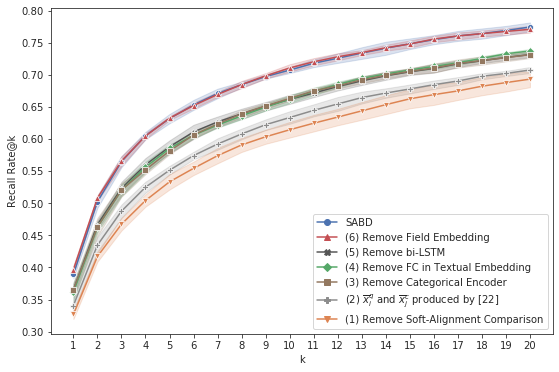

In [108]:
labels =[]
recall_rate_res = {
"SABD": np.asarray([
 [0.39073305670816044, 0.5, 0.5691562932226832, 0.6113416320885201, 0.6376210235131397, 0.648686030428769, 0.6673582295988935, 0.6804979253112033, 0.6964038727524204, 0.7060857538035962, 0.7157676348547718, 0.7206085753803596, 0.7261410788381742, 0.7323651452282157, 0.7427385892116183, 0.7524204702627939, 0.7586445366528354, 0.76417704011065, 0.7676348547717843, 0.7745504840940526],
 [0.3796680497925311, 0.487551867219917, 0.5511756569847857, 0.5975103734439834, 0.623789764868603, 0.6507607192254495, 0.6721991701244814, 0.6839557399723375, 0.6970954356846473, 0.7095435684647303, 0.7185338865836791, 0.7282157676348547, 0.7378976486860305, 0.7461964038727524, 0.7496542185338866, 0.7565698478561549, 0.7627939142461964, 0.7662517289073306, 0.7724757952973721, 0.7766251728907331],
 [0.39557399723374825, 0.5096818810511756, 0.5712309820193637, 0.607192254495159, 0.6334716459197787, 0.6562932226832642, 0.6687413554633471, 0.6867219917012448, 0.6998616874135546, 0.7074688796680498, 0.7219917012448133, 0.7316735822959889, 0.7420470262793915, 0.7496542185338866, 0.7565698478561549, 0.7627939142461964, 0.7683264177040111, 0.7704011065006916, 0.7731673582295989, 0.7786998616874136],
 [0.3872752420470263, 0.5110650069156293, 0.5712309820193637, 0.6106500691562933, 0.640387275242047, 0.6659751037344398, 0.6839557399723375, 0.6922544951590595, 0.7019363762102351, 0.7143845089903181, 0.7261410788381742, 0.7344398340248963, 0.7427385892116183, 0.7517289073305671, 0.7572614107883817, 0.760027662517289, 0.7669432918395575, 0.7717842323651453, 0.7766251728907331, 0.7821576763485477],
 [0.39280774550484093, 0.5048409405255878, 0.5622406639004149, 0.6023513139695712, 0.6258644536652835, 0.6466113416320886, 0.665283540802213, 0.6825726141078838, 0.6936376210235131, 0.7019363762102351, 0.7102351313969572, 0.7171507607192255, 0.7233748271092669, 0.7295988934993084, 0.7385892116182573, 0.7448132780082988, 0.7489626556016598, 0.7517289073305671, 0.7579529737206085, 0.7634854771784232]
]),
'(3) Remove Categorical Encoder':  np.asarray([
    [0.3450899031811895, 0.4432918395573997, 0.5138312586445366, 0.5477178423236515, 0.578838174273859, 0.6058091286307054, 0.6251728907330567, 0.636237897648686, 0.6473029045643154, 0.661134163208852, 0.669432918395574, 0.6784232365145229, 0.6881051175656985, 0.6957123098201936, 0.7012448132780082, 0.7060857538035962, 0.7136929460580913, 0.7199170124481328, 0.7226832641770401, 0.7261410788381742],
 [0.3699861687413555, 0.45712309820193636, 0.5117565698478561, 0.5463347164591977, 0.5795297372060858, 0.6065006915629322, 0.6244813278008299, 0.6424619640387276, 0.6514522821576764, 0.6618257261410788, 0.6763485477178424, 0.6825726141078838, 0.6908713692946058, 0.6970954356846473, 0.7053941908713693, 0.7123098201936376, 0.7240663900414938, 0.7275242047026279, 0.7323651452282157, 0.7365145228215768],
 [0.3706777316735823, 0.47372060857538034, 0.5159059474412172, 0.5525587828492393, 0.5781466113416321, 0.598893499308437, 0.6168741355463347, 0.632088520055325, 0.6493775933609959, 0.661134163208852, 0.6728907330567082, 0.6804979253112033, 0.6887966804979253, 0.6957123098201936, 0.7012448132780082, 0.7026279391424619, 0.7102351313969572, 0.7136929460580913, 0.7213001383125864, 0.7282157676348547],
 [0.3706777316735823, 0.46265560165975106, 0.5262793914246197, 0.5518672199170125, 0.5816044260027663, 0.6099585062240664, 0.6244813278008299, 0.6410788381742739, 0.65283540802213, 0.6680497925311203, 0.677731673582296, 0.6867219917012448, 0.6957123098201936, 0.7040110650069157, 0.7102351313969572, 0.715076071922545, 0.7178423236514523, 0.7226832641770401, 0.7261410788381742, 0.7302904564315352],
 [0.37136929460580914, 0.47925311203319504, 0.5366528354080221, 0.5636237897648686, 0.5905947441217151, 0.6127247579529738, 0.627939142461964, 0.6466113416320886, 0.6590594744121715, 0.6666666666666666, 0.6804979253112033, 0.6881051175656985, 0.7005532503457814, 0.706777316735823, 0.7116182572614108, 0.7199170124481328, 0.7247579529737206, 0.7302904564315352, 0.7344398340248963, 0.7385892116182573]    
]),
'(2) $\overline{x}^{q}_i$ and $\overline{x}^{c}_j$ produced by [22]': np.asarray([
    [0.3575380359612725, 0.4536652835408022, 0.5, 0.5359612724757953, 0.5587828492392808, 0.5802213001383126, 0.598893499308437, 0.6147994467496543, 0.6244813278008299, 0.6327800829875518, 0.6431535269709544, 0.6576763485477178, 0.6645919778699861, 0.6701244813278008, 0.677731673582296, 0.6874135546334716, 0.6922544951590595, 0.6998616874135546, 0.7026279391424619, 0.7123098201936376],
    [0.34024896265560167, 0.43291839557399725, 0.4806362378976487, 0.5221300138312587, 0.5546334716459198, 0.5781466113416321, 0.5947441217150761, 0.6085753803596127, 0.6230982019363762, 0.6369294605809128, 0.6466113416320886, 0.6576763485477178, 0.669432918395574, 0.6756569847856155, 0.6811894882434302, 0.6867219917012448, 0.6915629322268326, 0.6998616874135546, 0.7033195020746889, 0.7053941908713693],
 [0.3457814661134163, 0.43499308437067774, 0.4896265560165975, 0.5283540802213001, 0.5560165975103735, 0.5774550484094052, 0.6023513139695712, 0.6141078838174274, 0.6300138312586445, 0.640387275242047, 0.6535269709543569, 0.6639004149377593, 0.6687413554633471, 0.6742738589211619, 0.6825726141078838, 0.6874135546334716, 0.6915629322268326, 0.6957123098201936, 0.6998616874135546, 0.7053941908713693],
 [0.3278008298755187, 0.41770401106500693, 0.47441217150760717, 0.5124481327800829, 0.5428769017980636, 0.5663900414937759, 0.5816044260027663, 0.5940525587828492, 0.6085753803596127, 0.6175656984785616, 0.6300138312586445, 0.636237897648686, 0.6493775933609959, 0.6604426002766252, 0.6666666666666666, 0.673582295988935, 0.6811894882434302, 0.6915629322268326, 0.6984785615491009, 0.7033195020746889],
 [0.33195020746887965, 0.43499308437067774, 0.49446749654218536, 0.5269709543568465, 0.5463347164591977, 0.5705394190871369, 0.5850622406639004, 0.6099585062240664, 0.6272475795297372, 0.6417704011065007, 0.6521438450899032, 0.6597510373443983, 0.6728907330567082, 0.6798063623789765, 0.6839557399723375, 0.690179806362379, 0.6977869986168741, 0.7040110650069157, 0.7088520055325035, 0.7136929460580913]
      ]),
'(5) Remove bi-LSTM': np.asarray([
    [0.3582295988934993, 0.4605809128630705, 0.5228215767634855, 0.5636237897648686, 0.5947441217150761, 0.6196403872752421, 0.6341632088520055, 0.6473029045643154, 0.6590594744121715, 0.6708160442600276, 0.6791147994467497, 0.686030428769018, 0.69432918395574, 0.7005532503457814, 0.7074688796680498, 0.7102351313969572, 0.7164591977869986, 0.7206085753803596, 0.7226832641770401, 0.7268326417704011],
 [0.36099585062240663, 0.47441217150760717, 0.5408022130013831, 0.573997233748271, 0.5982019363762102, 0.6230982019363762, 0.6355463347164592, 0.6466113416320886, 0.656984785615491, 0.6645919778699861, 0.6742738589211619, 0.6867219917012448, 0.6922544951590595, 0.7005532503457814, 0.7053941908713693, 0.7116182572614108, 0.7164591977869986, 0.7199170124481328, 0.7268326417704011, 0.7316735822959889],
 [0.36376210235131395, 0.45919778699861685, 0.5152143845089903, 0.5449515905947441, 0.5726141078838174, 0.5954356846473029, 0.6161825726141079, 0.6286307053941909, 0.6424619640387276, 0.6514522821576764, 0.6618257261410788, 0.6715076071922544, 0.6798063623789765, 0.6894882434301521, 0.6977869986168741, 0.7005532503457814, 0.7116182572614108, 0.7199170124481328, 0.7275242047026279, 0.7309820193637621],
 [0.38105117565698476, 0.46749654218533887, 0.5214384508990318, 0.5608575380359613, 0.5905947441217151, 0.6134163208852006, 0.6286307053941909, 0.6410788381742739, 0.6500691562932227, 0.661134163208852, 0.6715076071922544, 0.6839557399723375, 0.6957123098201936, 0.706777316735823, 0.7116182572614108, 0.719225449515906, 0.7254495159059474, 0.7282157676348547, 0.7344398340248963, 0.7385892116182573],
 [0.3603042876901798, 0.4723374827109267, 0.516597510373444, 0.5573997233748271, 0.5850622406639004, 0.6058091286307054, 0.6210235131396957, 0.6348547717842323, 0.648686030428769, 0.6632088520055325, 0.673582295988935, 0.6832641770401107, 0.6936376210235131, 0.6977869986168741, 0.7040110650069157, 0.710926694329184, 0.7185338865836791, 0.7233748271092669, 0.7268326417704011, 0.7323651452282157]
    ]),
'(6) Remove Field Embedding': np.asarray([
     [0.39073305670816044, 0.5069156293222683, 0.5629322268326418, 0.6002766251728907, 0.6334716459197787, 0.6597510373443983, 0.6749654218533887, 0.6922544951590595, 0.7026279391424619, 0.7116182572614108, 0.719225449515906, 0.7268326417704011, 0.7337482710926694, 0.7406639004149378, 0.7482710926694329, 0.7565698478561549, 0.7607192254495159, 0.7655601659751037, 0.7690179806362379, 0.7745504840940526],
 [0.3941908713692946, 0.5096818810511756, 0.5733056708160442, 0.6065006915629322, 0.6369294605809128, 0.6507607192254495, 0.6715076071922544, 0.6867219917012448, 0.6984785615491009, 0.7116182572614108, 0.719225449515906, 0.7282157676348547, 0.73582295988935, 0.7461964038727524, 0.7538035961272476, 0.7614107883817427, 0.7676348547717843, 0.7704011065006916, 0.7738589211618258, 0.7752420470262794],
 [0.39557399723374825, 0.5110650069156293, 0.5712309820193637, 0.6092669432918395, 0.6313969571230982, 0.6542185338865837, 0.669432918395574, 0.6881051175656985, 0.7026279391424619, 0.7178423236514523, 0.7289073305670816, 0.7344398340248963, 0.739972337482711, 0.7482710926694329, 0.7531120331950207, 0.760027662517289, 0.76417704011065, 0.7676348547717843, 0.7717842323651453, 0.7759336099585062],
 [0.4073305670816044, 0.5020746887966805, 0.5546334716459198, 0.5995850622406639, 0.6293222683264177, 0.6479944674965422, 0.669432918395574, 0.681881051175657, 0.6984785615491009, 0.7130013831258645, 0.7233748271092669, 0.7330567081604425, 0.7365145228215768, 0.7420470262793915, 0.7475795297372061, 0.7544951590594744, 0.760027662517289, 0.7614107883817427, 0.7627939142461964, 0.7648686030428768],
 [0.39557399723374825, 0.5117565698478561, 0.5684647302904564, 0.6092669432918395, 0.6334716459197787, 0.6500691562932227, 0.6639004149377593, 0.677731673582296, 0.6922544951590595, 0.7019363762102351, 0.7136929460580913, 0.7206085753803596, 0.7295988934993084, 0.7365145228215768, 0.739972337482711, 0.7489626556016598, 0.7531120331950207, 0.7586445366528354, 0.7634854771784232, 0.7669432918395575]
]),
'(1) Remove Soft-Alignment Comparison': np.asarray([
    [0.330567081604426, 0.42531120331950206, 0.4702627939142462, 0.5020746887966805, 0.5366528354080221, 0.5587828492392808, 0.5795297372060858, 0.598893499308437, 0.6113416320885201, 0.6265560165975104, 0.6348547717842323, 0.6452282157676349, 0.6583679114799447, 0.665283540802213, 0.6770401106500692, 0.6839557399723375, 0.686030428769018, 0.6929460580912863, 0.6977869986168741, 0.7033195020746889],
 [0.32710926694329184, 0.4066390041493776, 0.4633471645919779, 0.5027662517289073, 0.5283540802213001, 0.5470262793914247, 0.5705394190871369, 0.5850622406639004, 0.5995850622406639, 0.6058091286307054, 0.6127247579529738, 0.6230982019363762, 0.6307053941908713, 0.6410788381742739, 0.65283540802213, 0.6618257261410788, 0.6680497925311203, 0.6749654218533887, 0.6825726141078838, 0.6867219917012448],
 [0.33402489626556015, 0.42461964038727523, 0.483402489626556, 0.520746887966805, 0.5532503457814661, 0.5691562932226832, 0.5899031811894883, 0.6044260027662517, 0.6147994467496543, 0.6230982019363762, 0.6348547717842323, 0.6466113416320886, 0.6556016597510373, 0.669432918395574, 0.6763485477178424, 0.6832641770401107, 0.6894882434301521, 0.6984785615491009, 0.7047026279391425, 0.7074688796680498],
 [0.3153526970954357, 0.4114799446749654, 0.45850622406639, 0.495850622406639, 0.5255878284923928, 0.5560165975103735, 0.5746887966804979, 0.5905947441217151, 0.6065006915629322, 0.6203319502074689, 0.6334716459197787, 0.6390041493775933, 0.6479944674965422, 0.6576763485477178, 0.6659751037344398, 0.6728907330567082, 0.6784232365145229, 0.6839557399723375, 0.6881051175656985, 0.6950207468879668],
 [0.326417704011065, 0.41770401106500693, 0.46196403872752423, 0.5006915629322268, 0.5242047026279392, 0.5421853388658368, 0.5573997233748271, 0.5767634854771784, 0.5871369294605809, 0.5982019363762102, 0.6092669432918395, 0.6189488243430152, 0.6286307053941909, 0.636237897648686, 0.6431535269709544, 0.6459197786998617, 0.6549100968188105, 0.6632088520055325, 0.6687413554633471, 0.6763485477178424]
]), 
'(4) Remove FC in Textual Embedding': np.asarray([
  [0.3824343015214384, 0.4681881051175657, 0.5318118948824343, 0.5663900414937759, 0.5947441217150761, 0.6120331950207469, 0.627939142461964, 0.6369294605809128, 0.6500691562932227, 0.6604426002766252, 0.669432918395574, 0.6839557399723375, 0.6977869986168741, 0.7033195020746889, 0.7088520055325035, 0.7171507607192255, 0.7226832641770401, 0.7295988934993084, 0.73582295988935, 0.7406639004149378],
 [0.3478561549100968, 0.4633471645919779, 0.5262793914246197, 0.5587828492392808, 0.5809128630705395, 0.607192254495159, 0.623789764868603, 0.640387275242047, 0.6549100968188105, 0.669432918395574, 0.6798063623789765, 0.6881051175656985, 0.6950207468879668, 0.6998616874135546, 0.7060857538035962, 0.7116182572614108, 0.7164591977869986, 0.7247579529737206, 0.7337482710926694, 0.7365145228215768],
 [0.3582295988934993, 0.46265560165975106, 0.5214384508990318, 0.5601659751037344, 0.5892116182572614, 0.607192254495159, 0.6217150760719226, 0.6410788381742739, 0.65283540802213, 0.6680497925311203, 0.681881051175657, 0.6887966804979253, 0.6964038727524204, 0.7047026279391425, 0.7095435684647303, 0.715076071922545, 0.719225449515906, 0.7268326417704011, 0.7344398340248963, 0.7413554633471646],
 [0.3665283540802213, 0.4702627939142462, 0.5138312586445366, 0.5525587828492393, 0.5802213001383126, 0.598893499308437, 0.6168741355463347, 0.627939142461964, 0.6410788381742739, 0.6556016597510373, 0.669432918395574, 0.6784232365145229, 0.6894882434301521, 0.6977869986168741, 0.7053941908713693, 0.7081604426002767, 0.715076071922545, 0.7213001383125864, 0.7295988934993084, 0.7344398340248963],
 [0.35200553250345784, 0.45020746887966806, 0.5089903181189488, 0.5442600276625172, 0.58298755186722, 0.6065006915629322, 0.6203319502074689, 0.636237897648686, 0.6521438450899032, 0.6590594744121715, 0.6728907330567082, 0.6881051175656985, 0.6957123098201936, 0.7033195020746889, 0.7102351313969572, 0.7157676348547718, 0.7226832641770401, 0.7282157676348547, 0.7330567081604425, 0.73582295988935]])
}
    
sabd_map = np.asarray([0.5008231192662606, 0.49103181267409446, 0.5055610372608512, 0.5029891350542566, 0.500758743400453])
no_categorical = np.asarray([0.4518032195261643, 0.46675470338752645, 0.4695753300483674, 0.4695269407278329, 0.47519820882063574])
partial_compare = np.asarray([0.45391050502356467, 0.43922306187943755, 0.44376984832972716, 0.42730484805274066, 0.43662384503625445])
partial_compare_mean = np.asarray([0.436951500775059, 0.4336219135036544, 0.4203148804849569, 0.43608497309163946, 0.42900683260516986])
pooling_max_mean = np.asarray([0.4644489380070722, 0.4706768622189619, 0.46300845621313985, 0.4767475751335747, 0.4654830602513616])
no_field_emb = np.asarray([0.5017973327497333, 0.504609008258722, 0.5056959611050482, 0.5074944844567414, 0.5043621107036234])
no_matching = np.array([0.4290606130006212, 0.4208810557667172, 0.4335461977419362, 0.41621964934089595, 0.42057399615408386])
no_textual_encoder = np.array([0.4788499224157216, 0.459218543484206, 0.46418262731040866, 0.4671235192523706, 0.45693799359260046])

# order = ["CADD", '(1) Remove LSTM','(2) Remove Field Embedding', '(3) Remove Categorical Encoder', '(4) Partial Attention','(5) Remove FC in Textual Embedding', '(6) Remove Textual Comparison', '(5) Partial Attention - Mean']
order = ["SABD", 
         '(6) Remove Field Embedding', 
         '(5) Remove bi-LSTM', 
        '(4) Remove FC in Textual Embedding', 
         '(3) Remove Categorical Encoder',
         '(2) $\overline{x}^{q}_i$ and $\overline{x}^{c}_j$ produced by [22]',
         '(1) Remove Soft-Alignment Comparison'
        ]
plt.figure(figsize=(9, 6))

sn.set_style("ticks")
flatui = ["#4C72B0", "#C44E52", "#555555", "#55A868", "#937860", "#8C8C8C",  "#DD8452", "#8172B3"]
sn.set_palette(sn.color_palette(flatui))

markers = ['o','^','X','D','s','P', 'v']

k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=markers, dashes=False, data=convert2dataframe(recall_rate_res, order))
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')


fig = ax.get_figure()
fig.savefig("plots/ablation_study.pdf", format='pdf', bbox_inches='tight', pad_inches=0)

In [103]:
data = [
    ["SABD",sabd_map.mean(), sabd_map.std()],
    ["(6) Remove Field Embedding",no_field_emb.mean(), no_field_emb.std()],
    ["(5) Remove bi-LSTM", pooling_max_mean.mean(), pooling_max_mean.std()],
    ["(4) Remove FC in Textual Embedding", no_textual_encoder.mean(), no_textual_encoder.std()],
    ["(3) Remove Categorical Encoder",no_categorical.mean(), no_categorical.std()],
    ["(2) xi and x^c_j produced by [22]",partial_compare.mean(), partial_compare.std()],
    ["(1) Remove Soft-alignment Comparison", no_matching.mean(), no_matching.std()],
    
]

pd.DataFrame(data, columns=["Method", "MAP - Mean", "STD"])

,Method,MAP - Mean,STD
0,SABD,0.500233,0.004925
1,(6) Remove Field Embedding,0.504792,0.001860
2,(5) Remove bi-LSTM,0.468073,0.005050
3,(4) Remove FC in Textual Embedding,0.465263,0.007682
4,(3) Remove Categorical Encoder,0.466572,0.007878
5,(2) xi and x^c_j produced by [22],0.440166,0.008726
6,(1) Remove Soft-alignment Comparison,0.424056,0.006304


## Time window analisys

['Netbeans - 1 year', 'Netbeans - 3 years', 'Eclipse - 1 year', 'Eclipse - 3 years', 'Mozilla - 1 year', 'Mozilla - 3 years', 'OpenOffice - 1 year', 'OpenOffice - 3 years']


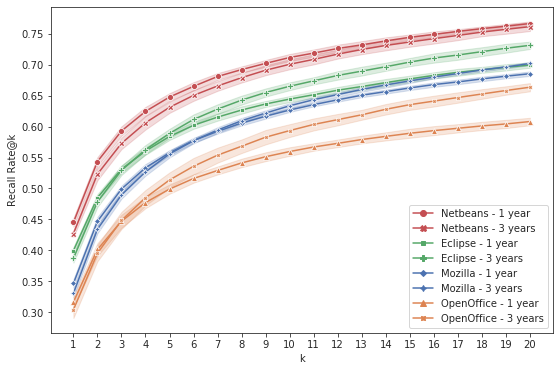

In [109]:
import collections


dc = collections.OrderedDict({"Eclipse - 1 year": np.asarray([
[0.4054794520547945, 0.4899543378995434, 0.5397260273972603, 0.5703196347031964, 0.5908675799086758, 0.6091324200913242, 0.6223744292237443, 0.6337899543378995, 0.6429223744292237, 0.6515981735159817, 0.6582191780821918, 0.6659817351598174, 0.6719178082191781, 0.6787671232876712, 0.6837899543378996, 0.6892694063926941, 0.6938356164383561, 0.6963470319634704, 0.702054794520548, 0.7047945205479452],
 [0.40273972602739727, 0.4840182648401826, 0.5287671232876713, 0.5561643835616439, 0.5771689497716895, 0.5958904109589042, 0.608675799086758, 0.6191780821917808, 0.6315068493150685, 0.6390410958904109, 0.6447488584474886, 0.6520547945205479, 0.6573059360730593, 0.6636986301369863, 0.6705479452054794, 0.6773972602739726, 0.6808219178082192, 0.6863013698630137, 0.6906392694063926, 0.6961187214611873],
 [0.39817351598173517, 0.4858447488584475, 0.5301369863013699, 0.5602739726027397, 0.5860730593607306, 0.6041095890410959, 0.6164383561643836, 0.6296803652968036, 0.6397260273972603, 0.6468036529680365, 0.6552511415525114, 0.6616438356164384, 0.6691780821917809, 0.6751141552511416, 0.6810502283105023, 0.6865296803652968, 0.6931506849315069, 0.6974885844748858, 0.7006849315068493, 0.7034246575342465],
 [0.4, 0.4899543378995434, 0.5335616438356164, 0.5607305936073059, 0.5865296803652968, 0.6050228310502284, 0.6191780821917808, 0.6289954337899544, 0.6360730593607306, 0.6426940639269406, 0.6502283105022831, 0.6570776255707762, 0.6643835616438356, 0.669634703196347, 0.6751141552511416, 0.6817351598173516, 0.6867579908675799, 0.6897260273972603, 0.6929223744292238, 0.6961187214611873],
 [0.3901826484018265, 0.47648401826484016, 0.5232876712328767, 0.5550228310502283, 0.5794520547945206, 0.5965753424657534, 0.6102739726027397, 0.6223744292237443, 0.6328767123287671, 0.6424657534246575, 0.6490867579908676, 0.6575342465753424, 0.6614155251141552, 0.6687214611872146, 0.6753424657534246, 0.6794520547945205, 0.6844748858447488, 0.6892694063926941, 0.6931506849315069, 0.6970319634703196] 
]),
"Eclipse - 3 years": np.asarray([
   [0.37625570776255707, 0.46735159817351596, 0.5182648401826484, 0.5506849315068493, 0.5778538812785388, 0.6013698630136987, 0.6191780821917808, 0.6353881278538813, 0.6488584474885845, 0.6593607305936073, 0.6684931506849315, 0.6757990867579908, 0.682648401826484, 0.6897260273972603, 0.6972602739726027, 0.702054794520548, 0.7063926940639269, 0.713013698630137, 0.7184931506849315, 0.7244292237442922], 
 [0.39452054794520547, 0.4853881278538813, 0.5385844748858447, 0.5712328767123288, 0.5972602739726027, 0.6205479452054794, 0.6385844748858448, 0.6529680365296804, 0.6657534246575343, 0.6760273972602739, 0.6837899543378996, 0.6940639269406392, 0.7018264840182649, 0.7075342465753425, 0.7150684931506849, 0.7226027397260274, 0.7278538812785388, 0.7324200913242009, 0.7372146118721461, 0.7394977168949771],
 [0.38949771689497714, 0.4876712328767123, 0.5328767123287671, 0.565068493150685, 0.593607305936073, 0.619406392694064, 0.6340182648401826, 0.647716894977169, 0.6568493150684932, 0.6641552511415525, 0.6726027397260274, 0.6821917808219178, 0.6892694063926941, 0.6958904109589041, 0.7050228310502283, 0.7116438356164384, 0.7157534246575342, 0.7214611872146118, 0.7278538812785388, 0.7331050228310503],
 [0.38789954337899546, 0.476027397260274, 0.5299086757990867, 0.5625570776255707, 0.5881278538812785, 0.6089041095890411, 0.6248858447488584, 0.6394977168949771, 0.6515981735159817, 0.6636986301369863, 0.673972602739726, 0.6819634703196347, 0.6876712328767123, 0.6968036529680365, 0.7031963470319634, 0.7084474885844749, 0.7139269406392694, 0.7178082191780822, 0.7219178082191781, 0.7269406392694064],
 [0.3858447488584475, 0.47534246575342465, 0.5269406392694064, 0.5641552511415525, 0.5885844748858448, 0.6077625570776256, 0.6246575342465753, 0.6385844748858448, 0.6527397260273973, 0.663013698630137, 0.6712328767123288, 0.6796803652968036, 0.6872146118721462, 0.6942922374429223, 0.7011415525114155, 0.7095890410958904, 0.7148401826484019, 0.7214611872146118, 0.7280821917808219, 0.7333333333333333]
]),
"OpenOffice - 1 year": np.asarray([
    [0.3053173241852487, 0.3951543739279588, 0.44125214408233276, 0.475557461406518, 0.49678387650085765, 0.5120068610634648, 0.5246569468267581, 0.5347341337907375, 0.5456689536878216, 0.5525300171526587, 0.5621783876500858, 0.5688250428816467, 0.5754716981132075, 0.5801886792452831, 0.5855488850771869, 0.5900514579759862, 0.5947684391080618, 0.5988421955403087, 0.6022727272727273, 0.605917667238422],
 [0.3177530017152659, 0.399442538593482, 0.4466123499142367, 0.4766295025728988, 0.49656946826758147, 0.5137221269296741, 0.5268010291595198, 0.5400943396226415, 0.5518867924528302, 0.5621783876500858, 0.5690394511149228, 0.5752572898799314, 0.5804030874785592, 0.5857632933104632, 0.5915523156089194, 0.5958404802744426, 0.5992710120068611, 0.6027015437392796, 0.6054888507718696, 0.6102058319039451],
 [0.32289879931389365, 0.4090909090909091, 0.4530445969125214, 0.47641509433962265, 0.5, 0.5197255574614065, 0.5308747855917667, 0.5439536878216124, 0.5527444253859348, 0.5619639794168096, 0.5688250428816467, 0.5731132075471698, 0.5782590051457976, 0.5838336192109777, 0.5881217838765008, 0.5917667238421955, 0.5951972555746141, 0.5996998284734134, 0.6037735849056604, 0.6078473413379074],
 [0.3276157804459691, 0.4140222984562607, 0.4607632933104631, 0.4914236706689537, 0.510934819897084, 0.5261578044596913, 0.5394511149228131, 0.551672384219554, 0.5621783876500858, 0.5688250428816467, 0.5750428816466552, 0.5816895368782161, 0.5889794168096055, 0.5943396226415094, 0.6001286449399656, 0.6046312178387651, 0.6076329331046312, 0.6112778730703259, 0.6142795883361921, 0.616852487135506],
 [0.30853344768439106, 0.38893653516295024, 0.43331903945111494, 0.4659090909090909, 0.49056603773584906, 0.5090051457975986, 0.5235849056603774, 0.5358061749571184, 0.5441680960548885, 0.5529588336192109, 0.5600343053173242, 0.5658233276157805, 0.5724699828473413, 0.5769725557461407, 0.5806174957118353, 0.5853344768439108, 0.589622641509434, 0.5930531732418525, 0.5958404802744426, 0.6003430531732419]
    ]), 

"OpenOffice - 3 years" : np.asarray([
 [0.2881646655231561, 0.383147512864494, 0.4384648370497427, 0.47641509433962265, 0.5083619210977701, 0.5293739279588336, 0.5469554030874786, 0.5638936535162951, 0.5780445969125214, 0.5879073756432247, 0.5960548885077187, 0.6029159519725558, 0.6121355060034306, 0.6198542024013722, 0.6284305317324185, 0.6348627787307033, 0.6419382504288165, 0.6462264150943396, 0.6535162950257289, 0.6588765008576329],
 [0.31646655231560894, 0.4050171526586621, 0.46419382504288165, 0.4939965694682676, 0.5195111492281304, 0.5413807890222985, 0.5608919382504288, 0.5750428816466552, 0.5859777015437393, 0.5958404802744426, 0.6069897084048027, 0.6129931389365352, 0.6202830188679245, 0.6301457975986278, 0.6378644939965694, 0.6423670668953688, 0.6460120068610634, 0.6526586620926244, 0.6582332761578045, 0.6631646655231561],
 [0.29395368782161235, 0.38014579759862777, 0.43117495711835335, 0.46869639794168094, 0.49678387650085765, 0.5177958833619211, 0.5388078902229846, 0.5540308747855918, 0.5686106346483705, 0.58147512864494, 0.5926243567753001, 0.6024871355060034, 0.6125643224699828, 0.6211406518010292, 0.6282161234991424, 0.6340051457975986, 0.6404373927958834, 0.6472984562607204, 0.6535162950257289, 0.6582332761578045],
 [0.30253001715265865, 0.39879931389365353, 0.44832761578044594, 0.48649228130360206, 0.5145797598627787, 0.5370926243567753, 0.5523156089193825, 0.5656089193825042, 0.58147512864494, 0.5932675814751286, 0.6046312178387651, 0.6129931389365352, 0.6185677530017153, 0.6280017152658662, 0.6342195540308748, 0.6393653516295026, 0.6453687821612349, 0.6518010291595198, 0.6565180102915952, 0.6635934819897084],
 [0.3177530017152659, 0.40930531732418524, 0.4594768439108062, 0.49935677530017153, 0.5293739279588336, 0.5538164665523156, 0.5701114922813036, 0.5827615780445969, 0.6003430531732419, 0.6093481989708405, 0.6172813036020584, 0.625, 0.6318610634648371, 0.6410806174957119, 0.6487993138936535, 0.6556603773584906, 0.6614493996569468, 0.66573756432247, 0.6700257289879932, 0.6747427101200686],
    ]),

"Netbeans - 1 year" : np.asarray([
      [0.4378119385106808, 0.5362347774006788, 0.5847474545817528, 0.618087442603314, 0.6434418047514474, 0.6596126971451387, 0.6781792773008585, 0.688959872229986, 0.6967458574565781, 0.705330405270513, 0.7129167498502695, 0.7207027350768617, 0.7270912357756039, 0.7330804551806748, 0.7404671591135955, 0.7448592533439808, 0.7510481133958874, 0.7568376921541226, 0.7602315831503295, 0.7640247554402076],
    [0.4479936114993013, 0.5530045917348773, 0.6025154721501298, 0.6344579756438411, 0.6548213216210821, 0.6737871830704731, 0.6879616689958076, 0.6965462168097425, 0.7057296865641844, 0.7145138750249551, 0.7221002196047115, 0.7284887203034538, 0.7344779397085247, 0.7410660810541027, 0.7466560191655021, 0.7518466759832302, 0.7556398482731084, 0.7610301457376721, 0.7640247554402076, 0.768416849670593],
    [0.4372130165701737, 0.5366340586943502, 0.585945298462767, 0.6172888800159713, 0.6416450389299261, 0.6584148532641245, 0.6757835895388301, 0.6865641844679576, 0.6973447793970853, 0.7075264523857058, 0.7147135156717908, 0.7228987821920543, 0.7278897983629466, 0.7344779397085247, 0.7398682371730885, 0.744060690756638, 0.7502495508085446, 0.7538430824515872, 0.7588340986224795, 0.7636254741465363],
    [0.4493910960271511, 0.5450189658614494, 0.5947294869235377, 0.6238770213615492, 0.645038929926133, 0.663405869435017, 0.6773807147135157, 0.6905569974046716, 0.7017368736274705, 0.7117189059692554, 0.7175084847274905, 0.7234977041325614, 0.7298862048313036, 0.7370732681173887, 0.7444599720503094, 0.7494509882212018, 0.7538430824515872, 0.7578358953883011, 0.7610301457376721, 0.7658215212617289],
    [0.45258534637652226, 0.5468157316829707, 0.5967258933918946, 0.6290676781792773, 0.6542223996805749, 0.6703932920742663, 0.6859652625274506, 0.6985426232780995, 0.7097224995008984, 0.7197045318426831, 0.7272908764224396, 0.7360750648832102, 0.7416650029946097, 0.7472549411060092, 0.7508484727490518, 0.7554402076262727, 0.7590337392693153, 0.7626272709123577, 0.7676182870832502, 0.771611100019964]
    ]),

"Netbeans - 3 years" : np.asarray([
  [0.43022559393092435, 0.5252545418247155, 0.5723697344779397, 0.6067079257336794, 0.6308644440007986, 0.649630664803354, 0.6612098223198243, 0.6743861050109803, 0.6853663405869435, 0.6969454981034139, 0.705330405270513, 0.7141145937312837, 0.7203034537831903, 0.7270912357756039, 0.7332800958275105, 0.7376721900578957, 0.7410660810541027, 0.7476542223996806, 0.7522459572769016, 0.7578358953883011],
 [0.43302056298662406, 0.5296466360551009, 0.5811539229387104, 0.6142942703134359, 0.6386504292273907, 0.6566180874426033, 0.6721900578957876, 0.6857656218806149, 0.6965462168097425, 0.7069275304451986, 0.7163106408464763, 0.7234977041325614, 0.7332800958275105, 0.7404671591135955, 0.7458574565781593, 0.752645238570573, 0.7574366140946297, 0.7610301457376721, 0.7660211619085646, 0.7708125374326212],
 [0.42323817129167496, 0.5186664004791376, 0.5681772808943901, 0.5995208624475943, 0.627270912357756, 0.6452385705729686, 0.6608105410261529, 0.6739868237173089, 0.686963465761629, 0.6943501696945498, 0.7011379516869635, 0.711319624675584, 0.7189059692553403, 0.7254941106009184, 0.7308844080654822, 0.7362747055300459, 0.7426632062287882, 0.748652425633859, 0.7540427230984228, 0.7582351766819725],
 [0.4192453583549611, 0.5084847274905171, 0.5601916550209622, 0.5917348772210022, 0.6184867238969854, 0.6394489918147335, 0.6584148532641245, 0.6721900578957876, 0.684368137352765, 0.6939508884008784, 0.7023357955679776, 0.7107207027350768, 0.7183070473148333, 0.7238969854262328, 0.729686564184468, 0.7356757835895388, 0.7422639249351168, 0.7476542223996806, 0.7502495508085446, 0.7540427230984228],
 [0.4288281094030745, 0.5338390896386505, 0.5825514074665602, 0.6186863645438211, 0.6408464763425834, 0.6616091036134957, 0.6759832301856658, 0.6893591535236574, 0.702735076861649, 0.7117189059692554, 0.7185066879616689, 0.7262926731882612, 0.7326811738870034, 0.7392693152325813, 0.7444599720503094, 0.7488520662806948, 0.7538430824515872, 0.7592333799161509, 0.7640247554402076, 0.7672190057895788]

    ]),

"Mozilla - 1 year" : np.asarray([
     [0.3366663230594784, 0.4372745077827028, 0.492629625811772, 0.5266467374497474, 0.5553035769508298, 0.5743737758993919, 0.5896299350582415, 0.6018967116792083, 0.6130295845789094, 0.6240593753221317, 0.6318936192145139, 0.6395216987939387, 0.6468405319039274, 0.6525100505102567, 0.6581795691165859, 0.663539841253479, 0.6680754561385425, 0.6729203174930419, 0.6777651788475415, 0.6820946294196475],
    [0.35058241418410474, 0.453046077723946, 0.5031440057726008, 0.536542624471704, 0.5605607669312442, 0.5803525409751572, 0.5957117822904855, 0.6090093804762395, 0.6202453355324193, 0.6277703329553654, 0.6363261519430986, 0.6447788887743532, 0.6523038861972993, 0.6583857334295433, 0.663539841253479, 0.6694155241727657, 0.6741573033707865, 0.6784867539428925, 0.6823007937326049, 0.6865271621482322],
    [0.3524378930007216, 0.4526337490980311, 0.5051025667456963, 0.5405628285743738, 0.5613854241830739, 0.5817956911658592, 0.5940624677868261, 0.609215544789197, 0.6198330069065044, 0.6301412225543759, 0.6385939593856303, 0.6465312854344913, 0.6543655293268735, 0.6591073085248943, 0.6652922379136171, 0.6710648386764251, 0.6757035357179673, 0.6802391506030306, 0.684774765488094, 0.6888980517472425],
    [0.34151118441397793, 0.4411916297288939, 0.4942789403154314, 0.527883723327492, 0.5516957014740749, 0.5723121327698175, 0.5873621276157097, 0.601278218740336, 0.612101845170601, 0.6230285537573446, 0.633336769405216, 0.6405525203587259, 0.6479744356251933, 0.6535408720750439, 0.6598288836202454, 0.6645706628182662, 0.6683847026079786, 0.6735388104319142, 0.6780744253169776, 0.6812699721678177],
    [0.3503762498711473, 0.4500566951860633, 0.5000515410782393, 0.5359241315328317, 0.5593237810534997, 0.5794248015668487, 0.5945778785692196, 0.607772394598495, 0.6190083496546748, 0.6291104009895887, 0.6374600556643645, 0.6452942995567468, 0.652406968353778, 0.6593134728378518, 0.6659107308524894, 0.6710648386764251, 0.6749819606226162, 0.6805483970724667, 0.6846716833316153, 0.6890011339037213]    
    ]),

"Mozilla - 3 years": np.asarray([
[0.32718276466343676, 0.4297495103597567, 0.48654777857952786, 0.5239666013813009, 0.5515926193175962, 0.5742706937429131, 0.5902484279971137, 0.6059169157818781, 0.6194206782805897, 0.6323059478404288, 0.6431295742706937, 0.6502422430677249, 0.6573549118647563, 0.6636429234099578, 0.67147716730234, 0.6777651788475415, 0.6837439439233068, 0.6881764766518915, 0.6932275023193485, 0.6983816101432841],
 [0.3362539944335636, 0.44222245129368104, 0.4958251726626121, 0.5335532419338213, 0.5623131635913823, 0.5810741160705082, 0.5997319863931554, 0.6134419132048242, 0.625399443356355, 0.6364292340995774, 0.6463251211215338, 0.6530254612926503, 0.6626121018451706, 0.6694155241727657, 0.6748788784661375, 0.6805483970724667, 0.6864240799917535, 0.6928151736934337, 0.6986908566127203, 0.7035357179672199],
 [0.32233790330893725, 0.4257293062570869, 0.48087825997319866, 0.5179878363055355, 0.5500463869704154, 0.5729306257086898, 0.5890114421193692, 0.6039583548087826, 0.6154004741779198, 0.6273580043294505, 0.6368415627254922, 0.647355942686321, 0.6559117616740542, 0.6633336769405216, 0.6704463457375528, 0.6780744253169776, 0.6839501082362643, 0.6900319554685084, 0.6947737346665293, 0.7008555818987733],
 [0.3329553654262447, 0.43603752190495826, 0.4936604473765591, 0.5312854344912895, 0.5613854241830739, 0.5820018554788167, 0.597670343263581, 0.6136480775177817, 0.6257086898257912, 0.6378723842902794, 0.6484898464075869, 0.657457994021235, 0.6652922379136171, 0.6734357282754355, 0.6791052468817648, 0.6835377796103494, 0.6891042160602, 0.6940521595711783, 0.698793938769199, 0.7047727038449645],
 [0.332852283269766, 0.4362436862179157, 0.4905679826821977, 0.527883723327492, 0.5537573446036491, 0.5755076796206576, 0.5951963715080919, 0.6108648592928564, 0.6237501288526957, 0.6343675909700031, 0.6429234099577363, 0.6508607360065972, 0.6593134728378518, 0.667147716730234, 0.6736418925883929, 0.680445314915988, 0.6864240799917535, 0.6930213380063911, 0.6968353777961035, 0.7028141428718688]
]),
})

order = ['Netbeans - 1 year', 'Netbeans - 3 years', 'Eclipse - 1 year', 'Eclipse - 3 years',  'Mozilla - 1 year', 'Mozilla - 3 years', 'OpenOffice - 1 year', 'OpenOffice - 3 years']


print(order)
plt.figure(figsize=(9, 6))

sn.set_style("ticks")
# flatui = ["#C44E52", "#4C72B0", "#DD8452", "#55A868", "#937860", "#8C8C8C", "#8172B3"]
flatui = ["#C44E52", "#C44E52", "#55A868", "#55A868", "#4C72B0", "#4C72B0", "#DD8452", "#DD8452"]
sn.set_palette(sn.color_palette(flatui))

markers = True
dashes = False

k = list(range(1,21))
ax = sn.lineplot(x="k",y='Recall Rate@k',ci='sd',hue='method', style='method', markers=markers, dashes=dashes, data=convert2dataframe(dc, order))
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())



handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:], loc='lower right')

fig = ax.get_figure()
fig.savefig("plots/cadd_time_window_analysis.pdf", format='pdf', bbox_inches='tight', pad_inches=0)